Menggabungkan Data Overview + Visualization + Data Preprocessing + Modeling

Version 1 : https://colab.research.google.com/drive/1y46NTvT-_4Awdotzk1Ayyx90dnp4cdW8#scrollTo=MLK15PZ6tvrq (Raw Project) <br>
Version 2 : https://colab.research.google.com/drive/137-VWWJjM7wU7B2qGcMOTAxf6piYyIMd?authuser=2#scrollTo=O1fLBNNEJR_F (Exploring preprocessing + New algoritm) <br>
Version 3 : https://colab.research.google.com/drive/139vWgLk9Ll__R-qSvPPy4XOciJKoxi6l?authuser=2 (Explore with/without Feature engineering + Encoding)
Version 4 :  https://colab.research.google.com/drive/1Ppozu3hDXRcs7YKeQ4ZkTzmE7L3pEMv5?authuser=2#scrollTo=h4FtWP92n3N8 (Very Minimal Preprocessing + Without Feature Engineering)
Version 5 : **CURRENTLY HERE** Final Model and Evaluation

# Import Data

In [ ]:
!pip install kmodes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

%matplotlib inline

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

In [ ]:
filepath = 'https://raw.githubusercontent.com/Pieter414/BCCInternProject/main/shopping_behavior_updated.csv'

data = pd.read_csv(filepath, delimiter=',')

In [ ]:
data.to_csv('data.csv', index=False)

# Data Understanding

Tujuan Exploratory Data Analysis (EDA)


1. Memahami Data

2. Identifikasi Anomali

3. Identifikasi Pola dan Tren

4. Eksplorasi Hubungan

- Measure of Central Tendency: mean, median, modus
- Measure of Spread: variabilitas, varian, standar deviasi
- Measure of Distribution: skewness dan kurtosis

## Penjelasan Kolom

**About Dataset**

> Context:
The Consumer Behavior and Shopping Habits Dataset provides comprehensive insights into consumers' preferences, tendencies, and patterns during their shopping experiences. This dataset encompasses a diverse range of variables, including demographic information, purchase history, product preferences, shopping frequency, and online/offline shopping behavior. With this rich collection of data, analysts and researchers can delve into the intricacies of consumer decision-making processes, aiding businesses in crafting targeted marketing strategies, optimizing product offerings, and enhancing overall customer satisfaction. This dataset is essential for businesses aiming to tailor their strategies to meet customer needs and enhance their shopping experience, ultimately driving sales and loyalty.

**Dataset Glossary (Column-wise)**

> `Customer ID`: A unique identifier assigned to each individual customer, facilitating tracking and analysis of their shopping behavior over time.

> `Age`: The age of the customer, providing demographic information for segmentation and targeted marketing strategies.

> `Gender`: The gender identification of the customer, a key demographic variable influencing product preferences and purchasing patterns.

> `Item Purchased`: The specific product or item selected by the customer during the transaction.

> `Category`: The broad classification or group to which the purchased item belongs (e.g., clothing, electronics, groceries).

> `Purchase Amount (USD)`: The monetary value of the transaction, denoted in United States Dollars (USD), indicates the cost of the purchased item(s).

> `Location`: The geographical location where the purchase was made, offering insights into regional preferences and market trends.

> `Size`: The size specification (if applicable) of the purchased item, relevant for apparel, footwear, and certain consumer goods.

> `Color`: The color variant or choice associated with the purchased item, influencing customer preferences and product availability.

> `Season`: The seasonal relevance of the purchased item (e.g., spring, summer, fall, winter), impacting inventory management and marketing strategies.

> `Review Rating`: A numerical or qualitative assessment provided by the customer regarding their satisfaction with the purchased item.

> `Subscription Status`: Indicates whether the customer has opted for a subscription service, offering insights into their level of loyalty and potential for recurring revenue.

> `Shipping Type`: Specifies the method used to deliver the purchased item (e.g., standard shipping, express delivery), influencing delivery times and costs.

> `Discount Applied`: Indicates if any promotional discounts were applied to the purchase, shedding light on price sensitivity and promotion effectiveness.

> `Promo Code Used`: Notes whether a promotional code or coupon was utilized during the transaction, aiding in the evaluation of marketing campaign success.

> `Previous Purchases`: Provides information on the number or frequency of prior purchases made by the customer, contributing to customer segmentation and retention strategies.

> `Payment Method`: Specifies the mode of payment employed by the customer (e.g., credit card, cash), offering insights into preferred payment options.

> `Frequency of Purchases`: Indicates how often the customer engages in purchasing activities, a critical metric for assessing customer loyalty and lifetime value.

## Data overview

In [ ]:
data.head(10)

Customer ID  Age Gender Item Purchased     Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse     Clothing                     53   
1            2   19   Male        Sweater     Clothing                     64   
2            3   50   Male          Jeans     Clothing                     73   
3            4   21   Male        Sandals     Footwear                     90   
4            5   45   Male         Blouse     Clothing                     49   
5            6   46   Male       Sneakers     Footwear                     20   
6            7   63   Male          Shirt     Clothing                     85   
7            8   27   Male         Shorts     Clothing                     34   
8            9   26   Male           Coat    Outerwear                     97   
9           10   57   Male        Handbag  Accessories                     31   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   
5        Wyoming    M      White  Summer            2.9                 Yes   
6        Montana    M       Gray    Fall            3.2                 Yes   
7      Louisiana    L   Charcoal  Winter            3.2                 Yes   
8  West Virginia    L     Silver  Summer            2.6                 Yes   
9       Missouri    M       Pink  Spring            4.8                 Yes   

    Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0         Express              Yes             Yes                  14   
1         Express              Yes             Yes                   2   
2   Free Shipping              Yes             Yes                  23   
3    Next Day Air              Yes             Yes                  49   
4   Free Shipping              Yes             Yes                  31   
5        Standard              Yes             Yes                  14   
6   Free Shipping              Yes             Yes                  49   
7   Free Shipping              Yes             Yes                  19   
8         Express              Yes             Yes                   8   
9  2-Day Shipping              Yes             Yes                   4   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually  
5          Venmo                 Weekly  
6           Cash              Quarterly  
7    Credit Card                 Weekly  
8          Venmo               Annually  
9           Cash              Quarterly

In [ ]:
data.tail(10)

Customer ID  Age  Gender Item Purchased     Category  \
3890         3891   35  Female          Shirt     Clothing   
3891         3892   36  Female          Dress     Clothing   
3892         3893   35  Female        Jewelry  Accessories   
3893         3894   21  Female            Hat  Accessories   
3894         3895   66  Female          Skirt     Clothing   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
3890                     81       Nebraska   XL      Green  Winter   
3891                     30       Colorado    L      Peach  Winter   
3892                     86       Michigan    L     Indigo  Summer   
3893                     64  Massachusetts    L      White    Fall   
3894                     78    Connecticut    L      White  Spring   
3895                     28       Virginia    L  Turquoise  Summer   
3896                     49           Iowa    L      White  Spring   
3897                     33     New Jersey    L      Green  Spring   
3898                     77      Minnesota    S      Brown  Summer   
3899                     81     California    M      Beige  Spring   

      Review Rating Subscription Status   Shipping Type Discount Applied  \
3890            2.6                  No        Standard               No   
3891            4.7                  No   Free Shipping               No   
3892            3.5                  No        Standard               No   
3893            3.3                  No    Store Pickup               No   
3894            3.9                  No  2-Day Shipping               No   
3895            4.2                  No  2-Day Shipping               No   
3896            4.5                  No    Store Pickup               No   
3897            2.9                  No        Standard               No   
3898            3.8                  No         Express               No   
3899            3.1                  No    Store Pickup               No   

     Promo Code Used  Previous Purchases Payment Method Frequency of Purchases  
3890              No                  33     Debit Card               Annually  
3891              No                   6  Bank Transfer              Quarterly  
3892              No                   5         PayPal            Fortnightly  
3893              No                  29  Bank Transfer              Bi-Weekly  
3894              No                  44    Credit Card         Every 3 Months  
3895              No                  32          Venmo                 Weekly  
3896              No                  41  Bank Transfer              Bi-Weekly  
3897              No                  24          Venmo              Quarterly  
3898              No                  24          Venmo                 Weekly  
3899              No                  33          Venmo              Quarterly

In [ ]:
data.shape

(3900, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
data.describe()

Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000

In [ ]:
data.describe(include="all")

Customer ID          Age Gender Item Purchased  Category  \
count   3900.000000  3900.000000   3900           3900      3900   
unique          NaN          NaN      2             25         4   
top             NaN          NaN   Male         Blouse  Clothing   
freq            NaN          NaN   2652            171      1737   
mean    1950.500000    44.068462    NaN            NaN       NaN   
std     1125.977353    15.207589    NaN            NaN       NaN   
min        1.000000    18.000000    NaN            NaN       NaN   
25%      975.750000    31.000000    NaN            NaN       NaN   
50%     1950.500000    44.000000    NaN            NaN       NaN   
75%     2925.250000    57.000000    NaN            NaN       NaN   
max     3900.000000    70.000000    NaN            NaN       NaN   

        Purchase Amount (USD) Location  Size  Color  Season  Review Rating  \
count             3900.000000     3900  3900   3900    3900    3900.000000   
unique                    NaN       50     4     25       4            NaN   
top                       NaN  Montana     M  Olive  Spring            NaN   
freq                      NaN       96  1755    177     999            NaN   
mean                59.764359      NaN   NaN    NaN     NaN       3.749949   
std                 23.685392      NaN   NaN    NaN     NaN       0.716223   
min                 20.000000      NaN   NaN    NaN     NaN       2.500000   
25%                 39.000000      NaN   NaN    NaN     NaN       3.100000   
50%                 60.000000      NaN   NaN    NaN     NaN       3.700000   
75%                 81.000000      NaN   NaN    NaN     NaN       4.400000   
max                100.000000      NaN   NaN    NaN     NaN       5.000000   

       Subscription Status  Shipping Type Discount Applied Promo Code Used  \
count                 3900           3900             3900            3900   
unique                   2              6                2               2   
top                     No  Free Shipping               No              No   
freq                  2847            675             2223            2223   
mean                   NaN            NaN              NaN             NaN   
std                    NaN            NaN              NaN             NaN   
min                    NaN            NaN              NaN             NaN   
25%                    NaN            NaN              NaN             NaN   
50%                    NaN            NaN              NaN             NaN   
75%                    NaN            NaN              NaN             NaN   
max                    NaN            NaN              NaN             NaN   

        Previous Purchases Payment Method Frequency of Purchases  
count          3900.000000           3900                   3900  
unique                 NaN              6                      7  
top                    NaN         PayPal         Every 3 Months  
freq                   NaN            677                    584  
mean             25.351538            NaN                    NaN  
std              14.447125            NaN                    NaN  
min               1.000000            NaN                    NaN  
25%              13.000000            NaN                    NaN  
50%              25.000000            NaN                    NaN  
75%              38.000000            NaN                    NaN  
max              50.000000            NaN                    NaN

In [ ]:
data.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

## Analisis Value Counts (Persebaran Data)

Pertama, ambil terlebih dahulu semua kolom object

In [ ]:
def show_value_count(data, label):
  value_count = data[label].value_counts()

  print(f"\nPersebaran dari kolom {label}: \n{value_count}")

In [ ]:
column_types = data.dtypes
object_columns = column_types[column_types == 'object'].index.tolist()

object_columns

['Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Payment Method',
 'Frequency of Purchases']

In [ ]:
integer_columns = column_types[column_types == 'int64'].index.tolist()
integer_columns

['Customer ID', 'Age', 'Purchase Amount (USD)', 'Previous Purchases']

In [ ]:
float_columns = column_types[column_types == 'float64'].index.tolist()
float_columns

['Review Rating']

In [ ]:
show_value_count(data, 'Item Purchased')


Persebaran dari kolom Item Purchased: 
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64


In [ ]:
for column in object_columns:
  show_value_count(data, column)


Persebaran dari kolom Gender: 
Male      2652
Female    1248
Name: Gender, dtype: int64

Persebaran dari kolom Item Purchased: 
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64

Persebaran dari kolom Category: 
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

Persebaran dari kolom Location: 
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86

In [ ]:
for column in float_columns:
  show_value_count(data, column)


Persebaran dari kolom Review Rating: 
3.4    182
4.0    181
4.6    174
4.2    171
2.9    170
4.9    166
3.9    163
3.0    162
2.6    159
4.4    158
3.1    157
3.7    156
3.5    156
2.7    154
3.3    152
3.2    152
3.6    149
4.7    148
4.1    148
4.3    147
4.8    144
3.8    142
4.5    139
2.8    136
5.0     68
2.5     66
Name: Review Rating, dtype: int64


In [ ]:
for column in integer_columns:
  show_value_count(data, column)


Persebaran dari kolom Customer ID: 
1       1
2621    1
2593    1
2594    1
2595    1
       ..
1305    1
1306    1
1307    1
1308    1
3900    1
Name: Customer ID, Length: 3900, dtype: int64

Persebaran dari kolom Age: 
69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: Age, dtype: int64

Persebaran dari kolom Purchase Amount (USD): 
94     62
32     62
36     62
51     61
90     60
       ..
100    36
87     35
49     35
69     34
61     33
Name: Purchase Amount (USD), Length: 81, dtype: int64

Persebaran dari kolom Previous Purchases: 
31    97
21    96
14  

## Missing Values

In [ ]:
data.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

Disimpulkan bahwa dataset ini tidak memiliki missing value di kolom manapun

## Duplicated values

In [ ]:
data.duplicated().sum()

0

In [ ]:
duplicate_without_id = (data.drop(columns=["Customer ID"]))
duplicate_without_id.duplicated().sum()

0

In [ ]:
data[data.duplicated()]

Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, Frequency of Purchases]
Index: []

In [ ]:
duplicate_without_id[duplicate_without_id.duplicated()]

Empty DataFrame
Columns: [Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, Frequency of Purchases]
Index: []

Dari diatas, ditemukan bahwa tidak ada data yang duplikat. Bahkan setelah mengecek data tanpa Customer ID, ditemukan tidak ada duplikat

# Business Question / Insight

SMART Method

- Specific
- Measurable
- Action Oriented
- Relevant
- Time Bound

# Pre Visualization and Analysis

Creating numerical data, categorical data and creating new column that maybe be usefull

## Num Data

In [ ]:
num_data = data.filter(integer_columns+float_columns).drop("Customer ID", axis=1)
num_data.head()

Age  Purchase Amount (USD)  Previous Purchases  Review Rating
0   55                     53                  14            3.1
1   19                     64                   2            3.1
2   50                     73                  23            3.1
3   21                     90                  49            3.5
4   45                     49                  31            2.7

## Region Grouping

In [ ]:
regions = {
    'New England': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont'],
    'Mideast': ['Delaware', 'District of Columbia', 'Maryland', 'New Jersey', 'New York', 'Pennsylvania'],
    'Great Lakes': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin'],
    'Plains': ['Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'Southeast': ['Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee', 'Virginia', 'West Virginia'],
    'Southwest': ['Arizona', 'New Mexico', 'Oklahoma', 'Texas'],
    'Rocky Mountain': ['Colorado', 'Idaho', 'Montana', 'Utah', 'Wyoming'],
    'Far West': ['Alaska', 'California', 'Hawaii', 'Nevada', 'Oregon', 'Washington']
}

In [ ]:
# Fungsi untuk menentukan region
def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Unknown'

In [ ]:
# Menambahkan kolom region ke dataframe
data['Region'] = data['Location'].apply(get_region)

data.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases       Region  
0          Venmo            Fortnightly    Southeast  
1           Cash            Fortnightly  New England  
2    Credit Card                 Weekly  New England  
3         PayPal                 Weekly  New England  
4         PayPal               Annually     Far West

In [ ]:
data.to_csv('data.csv', index=False)

In [ ]:
data["Region"].value_counts()

Southeast         947
Plains            541
Far West          466
New England       446
Rocky Mountain    406
Mideast           400
Great Lakes       396
Southwest         298
Name: Region, dtype: int64

In [ ]:
column_types = data.dtypes
object_columns = column_types[column_types == 'object'].index.tolist()

object_columns

['Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Payment Method',
 'Frequency of Purchases',
 'Region']

In [ ]:
category_data = data.filter(object_columns)
category_data.head()

Gender Item Purchased  Category       Location Size      Color  Season  \
0   Male         Blouse  Clothing       Kentucky    L       Gray  Winter   
1   Male        Sweater  Clothing          Maine    L     Maroon  Winter   
2   Male          Jeans  Clothing  Massachusetts    S     Maroon  Spring   
3   Male        Sandals  Footwear   Rhode Island    M     Maroon  Spring   
4   Male         Blouse  Clothing         Oregon    M  Turquoise  Spring   

  Subscription Status  Shipping Type Discount Applied Promo Code Used  \
0                 Yes        Express              Yes             Yes   
1                 Yes        Express              Yes             Yes   
2                 Yes  Free Shipping              Yes             Yes   
3                 Yes   Next Day Air              Yes             Yes   
4                 Yes  Free Shipping              Yes             Yes   

  Payment Method Frequency of Purchases       Region  
0          Venmo            Fortnightly    Southeast  
1           Cash            Fortnightly  New England  
2    Credit Card                 Weekly  New England  
3         PayPal                 Weekly  New England  
4         PayPal               Annually     Far West

## Age Grouping

In [ ]:
# Define a function to classify age groups
def classify_age_group(age):
  if age <= 19:
      return 'Teenager'
  elif 20 <= age <= 30:
      return 'Young_Adult'
  elif 31 <= age <= 44:
      return 'Adult'
  elif 45 <= age <= 59:
      return 'Middle_Age'
  else:
      return 'Elder'

# data['Age Group'] = data['Age'].apply(classify_age_group)

In [ ]:
# data['Age Group'].value_counts()

## Generation Grouping

In [ ]:
# Define a function to classify age groups
def classify_birth_year_group(age):
  birth_year = 2024 - age
  if birth_year >= 2013:
      return 'Gen_Alpha'
  elif 1995 <= birth_year <= 2012:
      return 'Gen_Z'
  elif 1980 <= birth_year <= 1994:
      return 'Millenials'
  elif 1965 <= birth_year <= 1979:
      return 'Gen_X'
  else:
      return 'Baby_Boomer'

data['Generation'] = data['Age'].apply(classify_birth_year_group)

In [ ]:
data['Generation'].value_counts()

Gen_X          1142
Millenials     1092
Gen_Z           878
Baby_Boomer     788
Name: Generation, dtype: int64

## Column Update

In [ ]:
column_types = data.dtypes
object_columns = column_types[column_types == 'object'].index.tolist()

object_columns

['Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Payment Method',
 'Frequency of Purchases',
 'Region',
 'Generation']

In [ ]:
integer_columns = column_types[column_types == 'int64'].index.tolist()
integer_columns

['Customer ID', 'Age', 'Purchase Amount (USD)', 'Previous Purchases']

In [ ]:
float_columns = column_types[column_types == 'float64'].index.tolist()
float_columns

['Review Rating']

In [ ]:
data.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases       Region Generation  
0          Venmo            Fortnightly    Southeast      Gen_X  
1           Cash            Fortnightly  New England      Gen_Z  
2    Credit Card                 Weekly  New England      Gen_X  
3         PayPal                 Weekly  New England      Gen_Z  
4         PayPal               Annually     Far West      Gen_X

# Preprocessing

In [ ]:
process_data = data.copy()
process_data.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases       Region Generation  
0          Venmo            Fortnightly    Southeast      Gen_X  
1           Cash            Fortnightly  New England      Gen_Z  
2    Credit Card                 Weekly  New England      Gen_X  
3         PayPal                 Weekly  New England      Gen_Z  
4         PayPal               Annually     Far West      Gen_X

In [ ]:
process_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

Bagi jadi tiga,
nan_process_data,
nan_encoding_data,
processed_data,

## Drop Useless Column

In [ ]:
def drop_column(data, all_columns):
  clean_data = data.drop(columns=all_columns)
  return clean_data

In [ ]:
max_df = drop_column(process_data.copy(), ["Customer ID", "Color", "Item Purchased", "Location"])
max_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3900 non-null   int64  
 1   Gender                  3900 non-null   object 
 2   Category                3900 non-null   object 
 3   Purchase Amount (USD)   3900 non-null   int64  
 4   Size                    3900 non-null   object 
 5   Season                  3900 non-null   object 
 6   Review Rating           3900 non-null   float64
 7   Subscription Status     3900 non-null   object 
 8   Shipping Type           3900 non-null   object 
 9   Discount Applied        3900 non-null   object 
 10  Promo Code Used         3900 non-null   object 
 11  Previous Purchases      3900 non-null   int64  
 12  Payment Method          3900 non-null   object 
 13  Frequency of Purchases  3900 non-null   object 
 14  Region                  3900 non-null   

## Splitting Categorical Value into Indicator Value

In [ ]:
# Method for preprocessing
def prep(df):

  # Convert kategorikal ke variabel indikator
  df_dummies_reg = pd.get_dummies(df['Region'])
  df_dummies_age = pd.get_dummies(df['Generation'])

  # Menggabungkan DataFrame asli dengan DataFrame hasil get_dummies
  df = pd.concat([df, df_dummies_reg, df_dummies_age], axis=1)

  # Hapus kolom yang sudah di convert
  df.drop(columns=[ 'Region', 'Generation'], axis=1, inplace=True)

  return df

In [ ]:
max_df = prep(max_df)
max_df
# sep = processed_data.iloc[:, 13:]
# sep.head()

Age  Gender     Category  Purchase Amount (USD) Size  Season  \
0      55    Male     Clothing                     53    L  Winter   
1      19    Male     Clothing                     64    L  Winter   
2      50    Male     Clothing                     73    S  Spring   
3      21    Male     Footwear                     90    M  Spring   
4      45    Male     Clothing                     49    M  Spring   
...   ...     ...          ...                    ...  ...     ...   
3895   40  Female     Clothing                     28    L  Summer   
3896   52  Female  Accessories                     49    L  Spring   
3897   46  Female  Accessories                     33    L  Spring   
3898   44  Female     Footwear                     77    S  Summer   
3899   52  Female  Accessories                     81    M  Spring   

      Review Rating Subscription Status   Shipping Type Discount Applied  ...  \
0               3.1                 Yes         Express              Yes  ...   
1               3.1                 Yes         Express              Yes  ...   
2               3.1                 Yes   Free Shipping              Yes  ...   
3               3.5                 Yes    Next Day Air              Yes  ...   
4               2.7                 Yes   Free Shipping              Yes  ...   
...             ...                 ...             ...              ...  ...   
3895            4.2                  No  2-Day Shipping               No  ...   
3896            4.5                  No    Store Pickup               No  ...   
3897            2.9                  No        Standard               No  ...   
3898            3.8                  No         Express               No  ...   
3899            3.1                  No    Store Pickup               No  ...   

     Mideast  New England Plains Rocky Mountain  Southeast  Southwest  \
0          0            0      0              0          1          0   
1          0            1      0              0          0          0   
2          0            1      0              0          0          0   
3          0            1      0              0          0          0   
4          0            0      0              0          0          0   
...      ...          ...    ...            ...        ...        ...   
3895       0            0      0              0          1          0   
3896       0            0      1              0          0          0   
3897       1            0      0              0          0          0   
3898       0            0      1              0          0          0   
3899       0            0      0              0          0          0   

      Baby_Boomer  Gen_X  Gen_Z  Millenials  
0               0      1      0           0  
1               0      0      1           0  
2               0      1      0           0  
3               0      0      1           0  
4               0      1      0           0  
...           ...    ...    ...         ...  
3895            0      0      0           1  
3896            0      1      0           0  
3897            0      1      0           0  
3898            0      0      0           1  
3899            0      1      0           0  

[3900 rows x 26 columns]

In [ ]:
column_types = max_df.dtypes

In [ ]:
object_columns = column_types[column_types == 'object'].index.tolist()
object_columns

['Gender',
 'Category',
 'Size',
 'Season',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Payment Method',
 'Frequency of Purchases']

## Splitting Categorical Value

In [ ]:
# menggunakan LabelEncoding untuk nan_process_data
le = LabelEncoder()

for column in object_columns:
  max_df[column] = le.fit_transform(max_df[column])

max_df.head()

Age  Gender  Category  Purchase Amount (USD)  Size  Season  Review Rating  \
0   55       1         1                     53     0       3            3.1   
1   19       1         1                     64     0       3            3.1   
2   50       1         1                     73     2       1            3.1   
3   21       1         2                     90     1       1            3.5   
4   45       1         1                     49     1       1            2.7   

   Subscription Status  Shipping Type  Discount Applied  ...  Mideast  \
0                    1              1                 1  ...        0   
1                    1              1                 1  ...        0   
2                    1              2                 1  ...        0   
3                    1              3                 1  ...        0   
4                    1              2                 1  ...        0   

   New England  Plains  Rocky Mountain  Southeast  Southwest  Baby_Boomer  \
0            0       0               0          1          0            0   
1            1       0               0          0          0            0   
2            1       0               0          0          0            0   
3            1       0               0          0          0            0   
4            0       0               0          0          0            0   

   Gen_X  Gen_Z  Millenials  
0      1      0           0  
1      0      1           0  
2      1      0           0  
3      0      1           0  
4      1      0           0  

[5 rows x 26 columns]

## Splitting Features and Target

In [ ]:
X_train = max_df.drop('Age', axis=1)
y_train = max_df['Age']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape, "\n")

X_train shape: (3900, 25)
y_train shape: (3900,) 



## Data transformation

In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train) , columns = X_train.columns)

In [ ]:
X_train.head()

Gender  Category  Purchase Amount (USD)      Size    Season  \
0  0.685994 -0.002002              -0.285629 -1.203814  1.349198   
1  0.685994 -0.002002               0.178852 -1.203814  1.349198   
2  0.685994 -0.002002               0.558882  0.945854 -0.441163   
3  0.685994  1.113356               1.276716 -0.128980 -0.441163   
4  0.685994 -0.002002              -0.454531 -0.128980 -0.441163   

   Review Rating  Subscription Status  Shipping Type  Discount Applied  \
0      -0.907584             1.644294      -0.892178          1.151339   
1      -0.907584             1.644294      -0.892178          1.151339   
2      -0.907584             1.644294      -0.303032          1.151339   
3      -0.349027             1.644294       0.286113          1.151339   
4      -1.466141             1.644294      -0.303032          1.151339   

   Promo Code Used  ...   Mideast  New England    Plains  Rocky Mountain  \
0         1.151339  ... -0.338062    -0.359341 -0.401323        -0.34088   
1         1.151339  ... -0.338062     2.782875 -0.401323        -0.34088   
2         1.151339  ... -0.338062     2.782875 -0.401323        -0.34088   
3         1.151339  ... -0.338062     2.782875 -0.401323        -0.34088   
4         1.151339  ... -0.338062    -0.359341 -0.401323        -0.34088   

   Southeast  Southwest  Baby_Boomer     Gen_X     Gen_Z  Millenials  
0   1.765862  -0.287631    -0.503203  1.554047 -0.539014    -0.62361  
1  -0.566296  -0.287631    -0.503203 -0.643481  1.855239    -0.62361  
2  -0.566296  -0.287631    -0.503203  1.554047 -0.539014    -0.62361  
3  -0.566296  -0.287631    -0.503203 -0.643481  1.855239    -0.62361  
4  -0.566296  -0.287631    -0.503203  1.554047 -0.539014    -0.62361  

[5 rows x 25 columns]

## Feature Selection Using Correlation

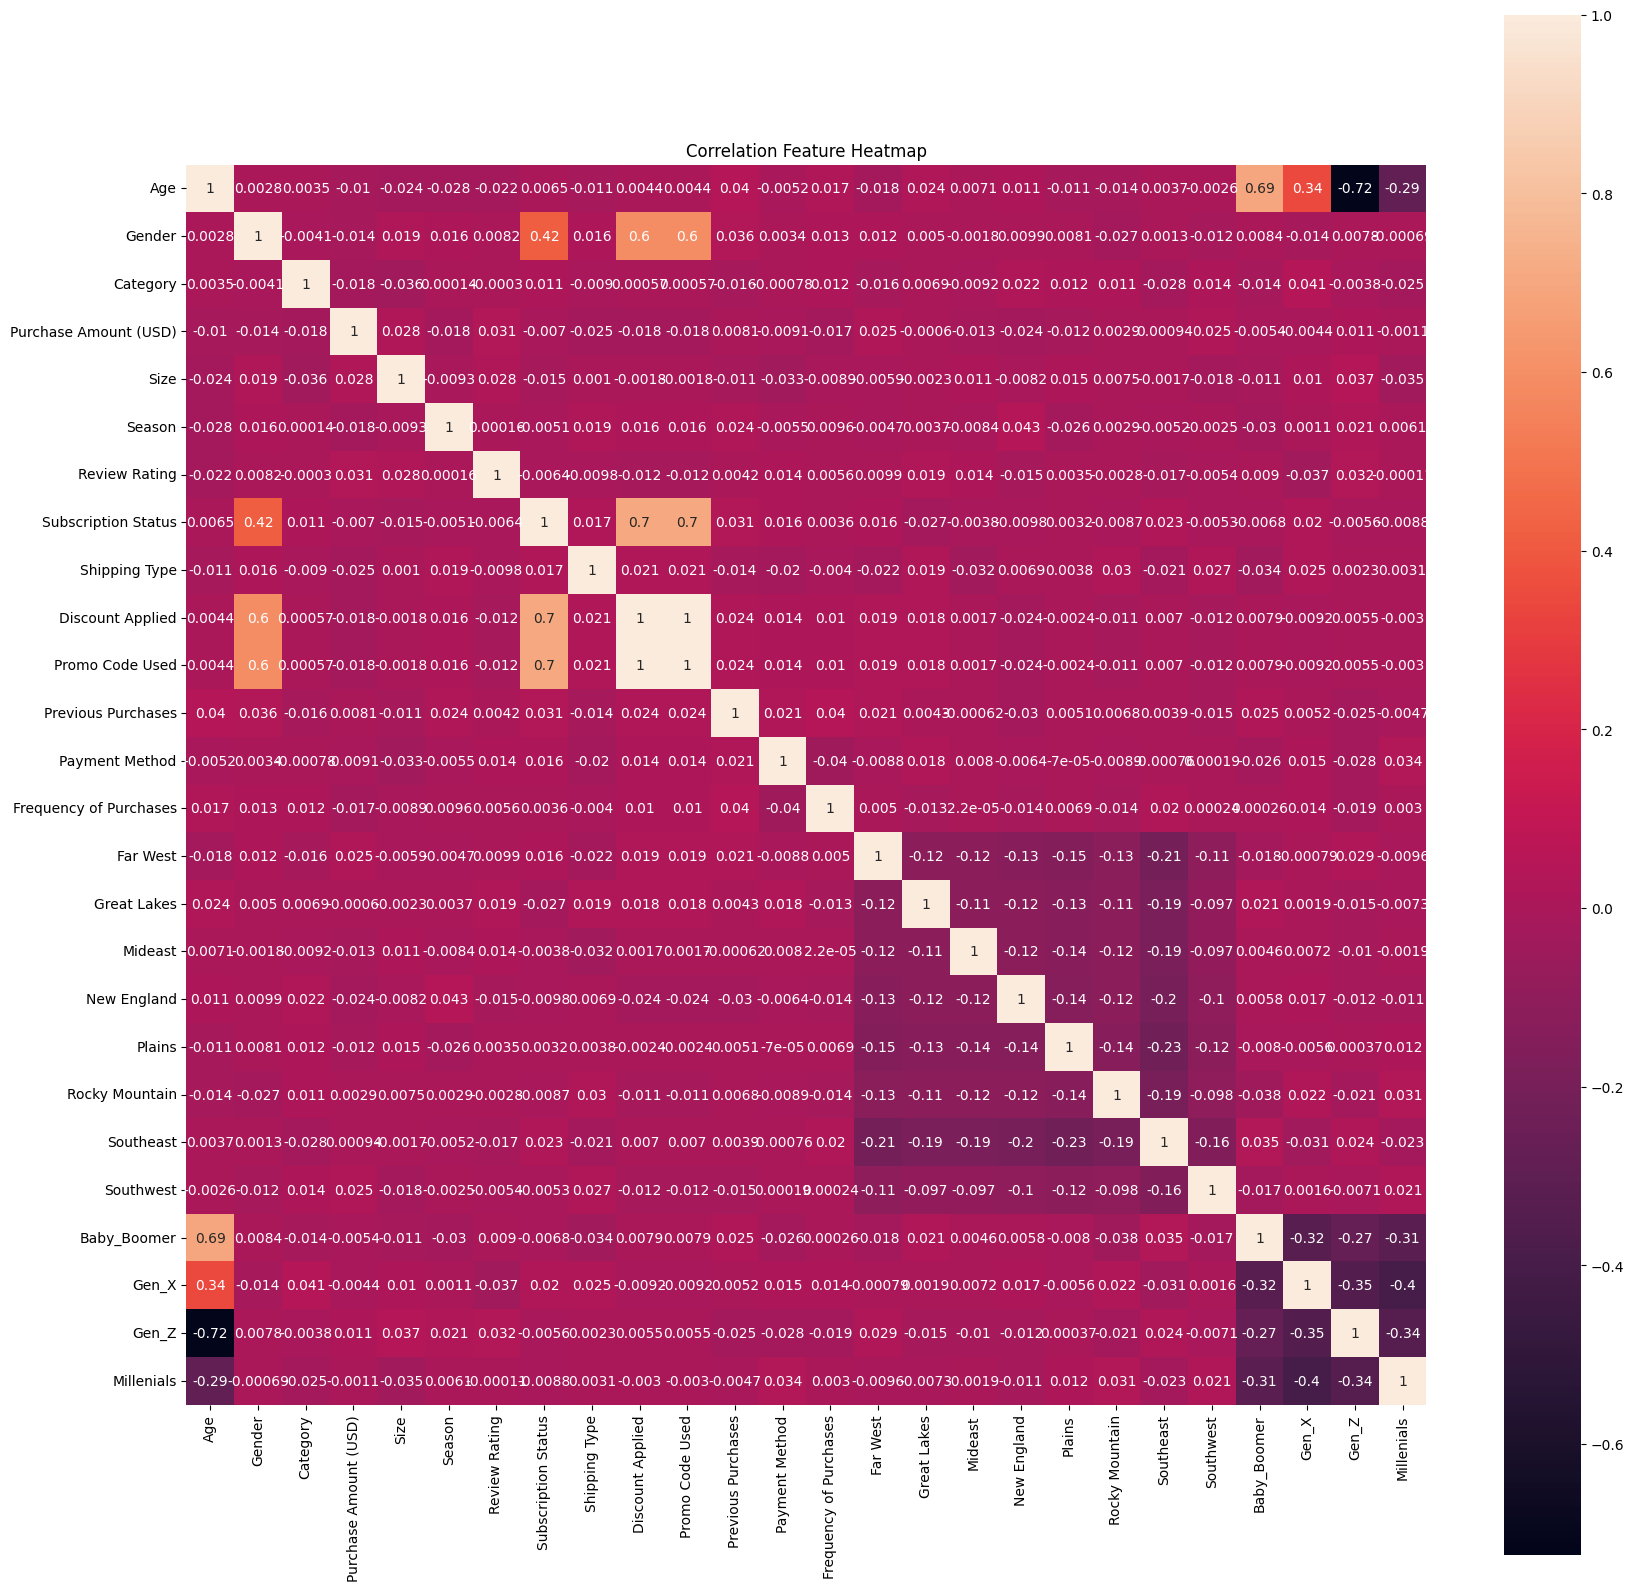

In [ ]:
corrmat = max_df.corr(method='pearson')
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, vmax=1, square=True);
plt.title('Correlation Feature Heatmap');
plt.show()

## Feature Selection Using Embedded Method

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

def calculate_inertia(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    return kmeans.inertia_

def feature_importance_kmeans(X, k):
    baseline_inertia = calculate_inertia(X, k)
    importances = []
    for feature in range(X.shape[1]):
        X_subset = np.delete(X, feature, axis=1)
        inertia = calculate_inertia(X_subset, k)
        importance = baseline_inertia - inertia
        importances.append(importance)
    return importances

In [ ]:
# X = X_train.values
# k = 4
# feature_importances = feature_importance_kmeans(X, k)

# # Create DataFrame for visualization
# importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
# importances_df = importances_df.sort_values(by='Importance', ascending=False)

# # Plot feature importance
# plt.figure(figsize=(10, 6))
# plt.barh(importances_df['Feature'], importances_df['Importance'])
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.title('Feature Importance (KMeans)')
# plt.show()

## Feature Selection PCA Algorithm (Num Data)

Numerical Data

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df is your DataFrame with numerical columns only
# num_nan_process = pd.DataFrame(nan_process_data["Age", "Purchase Amount (USD)"])
# Standardizing the features
X_process = StandardScaler().fit_transform(max_df)

# Performing PCA
pca = PCA(n_components=4)  # Adjust n_components based on your needs
principalComponents = pca.fit_transform(X_process)

# Creating a DataFrame with the principal components
df_pca_nan = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3', 'P4'])

In [ ]:
df_pca_nan

PC1       PC2       PC3        P4
0     2.347870 -1.043384 -0.586971  0.765925
1     2.215667  2.254708 -1.120050 -0.402143
2     2.271361 -0.939718 -0.163461  1.744196
3     2.321608  1.978481 -0.788992  0.322271
4     2.376400 -0.566216 -0.292665  1.853384
...        ...       ...       ...       ...
3895 -1.795600  0.523273  1.380185 -1.298014
3896 -1.831546 -0.894240  0.139394  0.914580
3897 -1.809259 -0.813811  0.149030  1.307111
3898 -1.851955  0.480944  1.830681 -0.279476
3899 -1.743491 -0.896780 -0.128919  2.308260

[3900 rows x 4 columns]

In [ ]:
# Getting the absolute values of the loadings
loadings_abs = abs(pca.components_)

# Sorting the loadings and getting the indices
sorted_indices = loadings_abs.argsort(axis=1)[:, ::-1]

# Getting the feature names
feature_names = max_df.columns

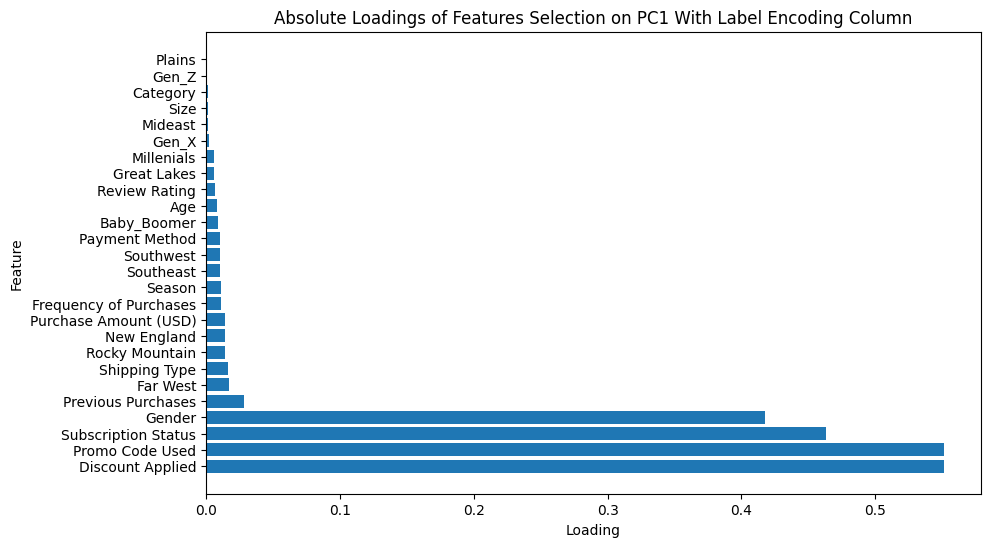

In [ ]:
# Get the indices of features sorted by their loadings
sorted_indices_pc1 = np.argsort(-loadings_abs[0])

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), loadings_abs[0, sorted_indices_pc1], align='center')
plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_indices_pc1])
plt.xlabel('Loading')
plt.ylabel('Feature')
plt.title('Absolute Loadings of Features Selection on PC1 With Label Encoding Column')
plt.show()

Just The Num Data

In [ ]:
# Assuming df is your DataFrame with numerical columns only
num_df = max_df[["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]]
# Standardizing the features
X_process = StandardScaler().fit_transform(num_df)

# Performing PCA
pca = PCA(n_components=4)  # Adjust n_components based on your needs
principalComponents = pca.fit_transform(X_process)

# Creating a DataFrame with the principal components
df_pca_nan = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3', 'P4'])

In [ ]:
df_pca_nan

PC1       PC2       PC3        P4
0    -0.679571 -0.875270  0.614511  0.658878
1     1.410280 -1.771317  0.922706 -0.457249
2    -0.420109 -0.106255  1.059586  0.064985
3     0.587576  1.135377  0.641926 -2.164980
4    -1.097818 -0.705935  0.517618 -0.735760
...        ...       ...       ...       ...
3895 -0.218962 -0.258706 -1.510175 -0.286120
3896 -0.472555  1.044618 -1.196806  0.047971
3897 -1.045337 -1.233821 -0.037709 -0.307054
3898  0.349887  0.390339  0.508452  0.100101
3899 -0.682302  0.543466  1.161314 -0.265794

[3900 rows x 4 columns]

In [ ]:
# Getting the absolute values of the loadings
loadings_abs = abs(pca.components_)

# Sorting the loadings and getting the indices
sorted_indices = loadings_abs.argsort(axis=1)[:, ::-1]

# Getting the feature names
feature_names = num_df.columns

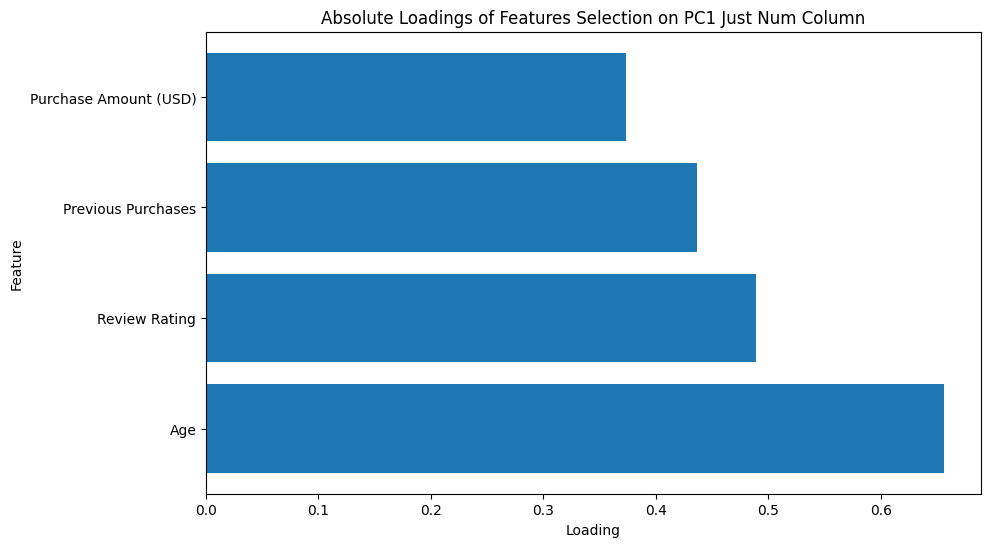

In [ ]:
# Get the indices of features sorted by their loadings
sorted_indices_pc1 = np.argsort(-loadings_abs[0])

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), loadings_abs[0, sorted_indices_pc1], align='center')
plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_indices_pc1])
plt.xlabel('Loading')
plt.ylabel('Feature')
plt.title('Absolute Loadings of Features Selection on PC1 Just Num Column')
plt.show()

## Chi Square Feature Selection

In [ ]:
chi_data = max_df.copy()

In [ ]:
chi_data.nunique()

Age                       53
Gender                     2
Category                   4
Purchase Amount (USD)     81
Size                       4
Season                     4
Review Rating             26
Subscription Status        2
Shipping Type              6
Discount Applied           2
Promo Code Used            2
Previous Purchases        50
Payment Method             6
Frequency of Purchases     7
Far West                   2
Great Lakes                2
Mideast                    2
New England                2
Plains                     2
Rocky Mountain             2
Southeast                  2
Southwest                  2
Baby_Boomer                2
Gen_X                      2
Gen_Z                      2
Millenials                 2
dtype: int64

In [ ]:
all = list(chi_data.columns)
all.remove("Age")
all.remove("Purchase Amount (USD)")
all.remove("Previous Purchases")
all.remove("Review Rating")

In [ ]:
chi_data.head()

Age  Gender  Category  Purchase Amount (USD)  Size  Season  Review Rating  \
0   55       1         1                     53     0       3            3.1   
1   19       1         1                     64     0       3            3.1   
2   50       1         1                     73     2       1            3.1   
3   21       1         2                     90     1       1            3.5   
4   45       1         1                     49     1       1            2.7   

   Subscription Status  Shipping Type  Discount Applied  ...  Mideast  \
0                    1              1                 1  ...        0   
1                    1              1                 1  ...        0   
2                    1              2                 1  ...        0   
3                    1              3                 1  ...        0   
4                    1              2                 1  ...        0   

   New England  Plains  Rocky Mountain  Southeast  Southwest  Baby_Boomer  \
0            0       0               0          1          0            0   
1            1       0               0          0          0            0   
2            1       0               0          0          0            0   
3            1       0               0          0          0            0   
4            0       0               0          0          0            0   

   Gen_X  Gen_Z  Millenials  
0      1      0           0  
1      0      1           0  
2      1      0           0  
3      0      1           0  
4      1      0           0  

[5 rows x 26 columns]

In [ ]:
X = chi_data[all]
y = chi_data[["Age"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
f_score = chi2(X_train, y_train)
f_score


(array([  20.47073631,   41.35872829,   47.54386168,   58.4241582 ,
          31.14235209,   47.54939112,   30.54571599,   30.54571599,
          56.47578381,   66.78155772,   58.86713826,   41.40723446,
          44.17677932,   43.17078102,   42.03593423,   53.56630476,
          51.3715991 ,   35.22946224, 2170.        , 1928.        ,
        2116.        , 1976.        ]),
 array([0.99997408, 0.85496143, 0.64958367, 0.25126716, 0.99037572,
        0.64937055, 0.99232699, 0.99232699, 0.31140636, 0.08147991,
        0.23867483, 0.85369461, 0.77128569, 0.80341537, 0.83670128,
        0.41397058, 0.49855284, 0.96383857, 0.        , 0.        ,
        0.        , 0.        ]))

In [ ]:
pvalues = pd.Series(f_score[1])
pvalues.index = X_train.columns

In [ ]:
pvalues = pvalues.sort_values(ascending=True)
pvalues

Millenials                0.000000
Gen_X                     0.000000
Baby_Boomer               0.000000
Gen_Z                     0.000000
Frequency of Purchases    0.081480
Far West                  0.238675
Season                    0.251267
Payment Method            0.311406
Rocky Mountain            0.413971
Southeast                 0.498553
Shipping Type             0.649371
Size                      0.649584
Mideast                   0.771286
New England               0.803415
Plains                    0.836701
Great Lakes               0.853695
Category                  0.854961
Southwest                 0.963839
Subscription Status       0.990376
Discount Applied          0.992327
Promo Code Used           0.992327
Gender                    0.999974
dtype: float64

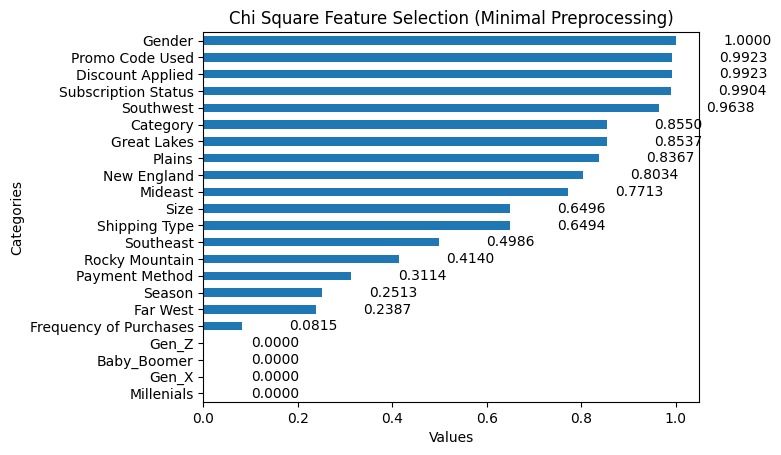

In [ ]:
ax = pvalues.plot(kind='barh')

# Adding labels to each bar
for i, v in enumerate(pvalues):
    ax.text(v + 0.1, i, "{:.4f}".format(v), ha='left', va='center')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Categories')
plt.title('Chi Square Feature Selection (Minimal Preprocessing)')

# Display the plot
plt.show()

# Modeling (All Preprocessing)

## Preparing Model Evaluation

In [ ]:
clus_score = pd.DataFrame(columns=["Model", "Silhouette Score"])

In [ ]:
X_column = 'Age'
y_column = 'Review Rating'

## Preparing

In [ ]:
X = max_df[[
    "Gender",
    "Gen_X",
    "Southeast",
    "Category",
    "Size",
    "Age",
    "Review Rating"
]]
X.head()

Gender  Gen_X  Southeast  Category  Size  Age  Review Rating
0       1      1          1         1     0   55            3.1
1       1      0          0         1     0   19            3.1
2       1      1          0         1     2   50            3.1
3       1      0          0         2     1   21            3.5
4       1      1          0         1     1   45            2.7

In [ ]:
# X_column = 'Review Rating'
# y_column = 'Previous Purchases'

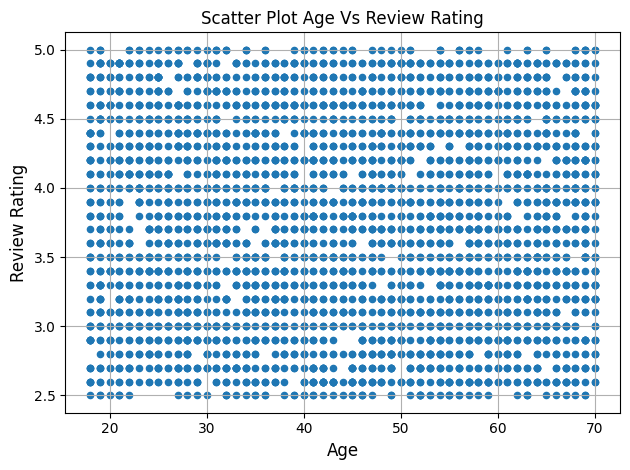

In [ ]:
plt.scatter(max_df[X_column],
            max_df[y_column],
            # c='white',
            # marker='o',
            # edgecolor='black',
            s=20)
plt.grid()
plt.title(f"Scatter Plot {X_column} Vs {y_column}")
plt.xlabel(X_column, fontsize=12)
plt.ylabel(y_column, fontsize=12)
plt.tight_layout()
plt.show()

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X_scaled = X

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

X_scaled_mm = X

## KMeans Clustering

In [ ]:
# n_init : cara inisilisasi
kmONLY = KMeans(n_clusters=4, random_state=0, n_init="auto")
kmONLY.fit(X)

y_km = kmONLY.predict(X)

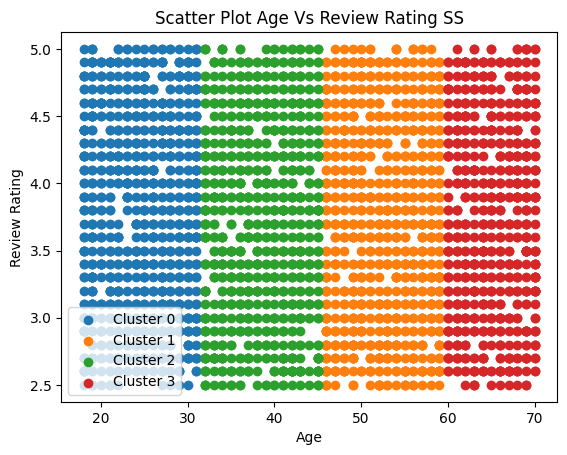

In [ ]:
# Assume 'X' is your features and 'y_km' are the labels from clustering
unique_labels = np.unique(y_km)
for label in unique_labels:
    plt.scatter(X[y_km == label][X_column], X[y_km == label][y_column], label=f'Cluster {label}')

plt.title(f"Scatter Plot {X_column} Vs {y_column} SS")
plt.xlabel(X_column)
plt.ylabel(y_column)
plt.legend()
plt.show()

In [ ]:
km_mm = KMeans(n_clusters=4, random_state=0, n_init="auto")
km_mm.fit(X_scaled_mm)

y_km_mm = km_mm.predict(X_scaled_mm)

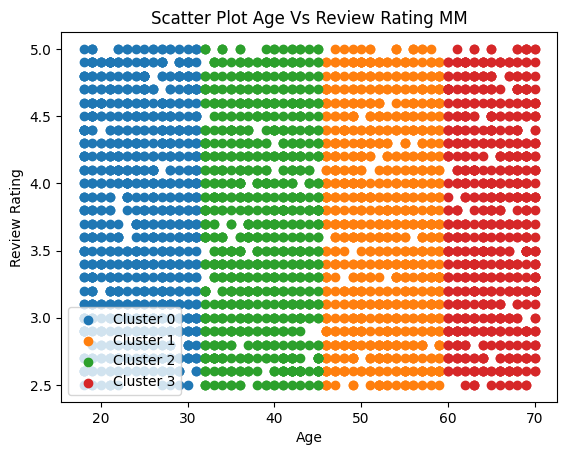

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume 'X' is your features and 'y_km' are the labels from clustering
unique_labels = np.unique(y_km_mm)
for label in unique_labels:
    plt.scatter(X[y_km_mm == label][X_column], X[y_km_mm == label][y_column], label=f'Cluster {label}')

plt.title(f"Scatter Plot {X_column} Vs {y_column} MM")
plt.xlabel(X_column)
plt.ylabel(y_column)
plt.legend()
plt.show()

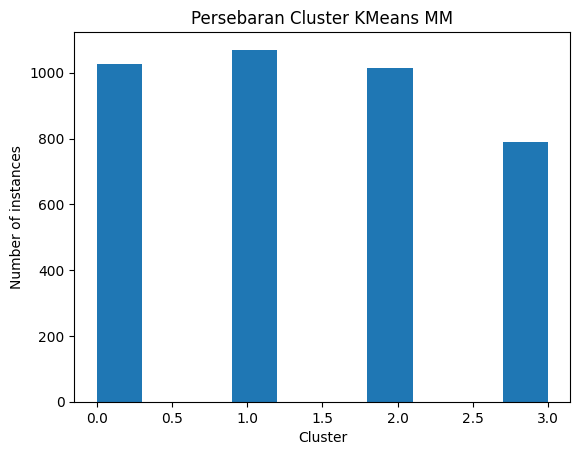

In [ ]:
plt.hist(y_km)
plt.xlabel('Cluster')
plt.ylabel('Number of instances')
plt.title('Persebaran Cluster KMeans MM')
plt.show()

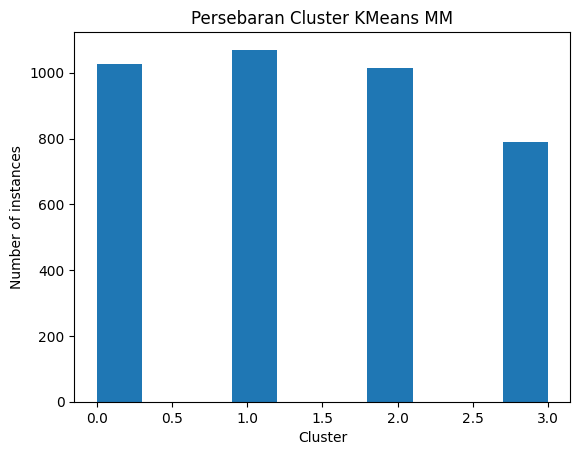

In [ ]:
plt.hist(y_km_mm)
plt.xlabel('Cluster')
plt.ylabel('Number of instances')
plt.title('Persebaran Cluster KMeans MM')
plt.show()

In [ ]:
np.bincount(y_km)

array([1028, 1070, 1014,  788])

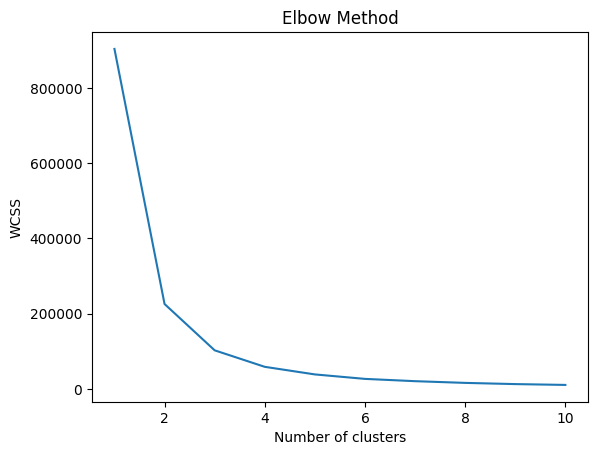

In [ ]:
from sklearn.cluster import KMeans

features = process_data[[X_column, y_column]]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

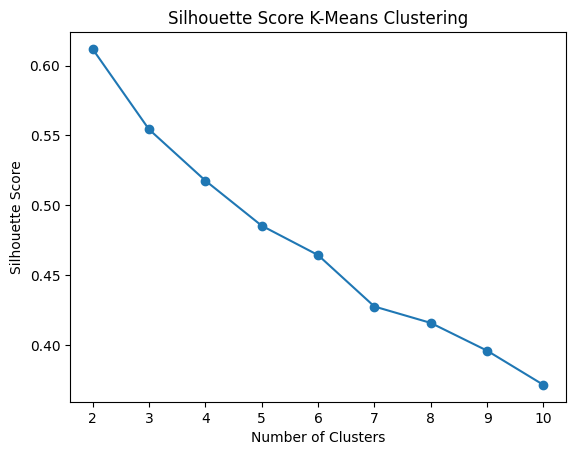

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Inisialisasi daftar untuk menyimpan nilai skor siluet
silhuette_X = X
silhouette_scores = []

# Melakukan KMeans untuk jumlah klaster dari 2 hingga 10
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clusters = kmeans.fit_predict(silhuette_X)
    silhouette_avg = silhouette_score(silhuette_X, clusters)
    silhouette_scores.append(silhouette_avg)

# Plot perubahan skor siluet
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
y_km

array([1, 0, 1, ..., 1, 2, 1], dtype=int32)

In [ ]:
score = silhouette_score(X, y_km)

new_row = {"Model": f"K-Means {X_column} {y_column} SS", "Silhouette Score": score}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

Model  Silhouette Score
0  K-Means Age Review Rating SS          0.516945

In [ ]:
score = silhouette_score(X_scaled_mm, y_km_mm)

new_row = {"Model": f"K-Means {X_column} {y_column} MM", "Silhouette Score": score}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

Model  Silhouette Score
0  K-Means Age Review Rating SS          0.516945
1  K-Means Age Review Rating MM          0.516945

In [ ]:
pd.DataFrame(y_km).value_counts()

1    1070
0    1028
2    1014
3     788
dtype: int64

In [ ]:
kmeans = pd.DataFrame(y_km, columns=["KMeans Cluster"])
kmeans

KMeans Cluster
0                  1
1                  0
2                  1
3                  0
4                  2
...              ...
3895               2
3896               1
3897               1
3898               2
3899               1

[3900 rows x 1 columns]

## Agglomerative Clustering

In [ ]:
# Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)

# Fit model and predict clusters
y_pred = AC.fit_predict(X_scaled)

score = silhouette_score(X_scaled, y_pred)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.49884967602144836


In [ ]:
np.bincount(y_pred)

array([1196, 1141,  788,  775])

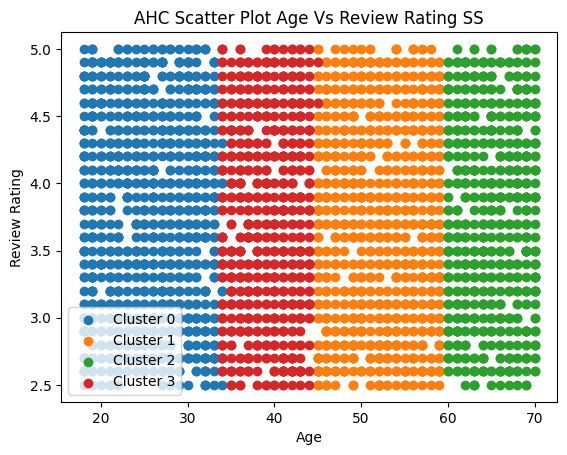

In [ ]:
# Assume 'X' is your features and 'y_km' are the labels from clustering
unique_labels = np.unique(y_pred)
for label in unique_labels:
    plt.scatter(X[y_pred == label][X_column], X[y_pred == label][y_column], label=f'Cluster {label}')

plt.title(f"AHC Scatter Plot {X_column} Vs {y_column} SS")
plt.xlabel(X_column)
plt.ylabel(y_column)
plt.legend()
plt.show()

In [ ]:
# Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)

# Fit model and predict clusters
y_pred_mm = AC.fit_predict(X_scaled_mm)

score = silhouette_score(X_scaled_mm, y_pred_mm)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.49884967602144836


In [ ]:
np.unique(y_km_mm)

array([0, 1, 2, 3], dtype=int32)

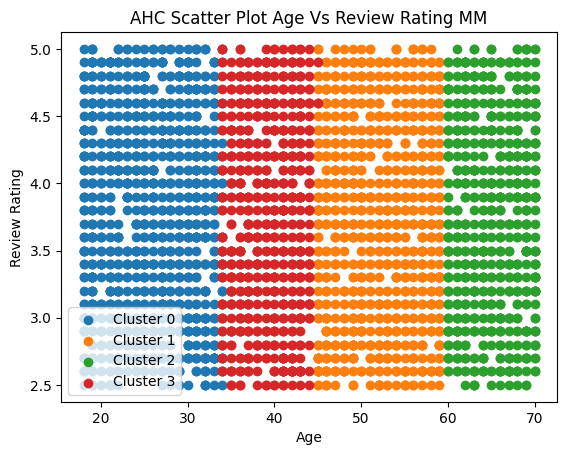

In [ ]:
# Assume 'X' is your features and 'y_km' are the labels from clustering
unique_labels = np.unique(y_pred_mm)
for label in unique_labels:
    plt.scatter(X[y_pred_mm == label][X_column], X[y_pred_mm == label][y_column], label=f'Cluster {label}')

plt.title(f"AHC Scatter Plot {X_column} Vs {y_column} MM")
plt.xlabel(X_column)
plt.ylabel(y_column)
plt.legend()
plt.show()

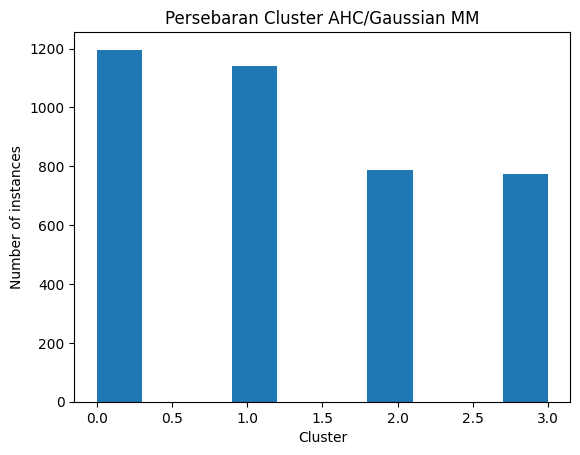

In [ ]:
plt.hist(y_pred_mm)
plt.xlabel('Cluster')
plt.ylabel('Number of instances')
plt.title('Persebaran Cluster AHC/Gaussian MM')
plt.show()

In [ ]:
ahc = pd.DataFrame(y_pred, columns=["AHC Cluster"])
ahc

AHC Cluster
0               1
1               0
2               1
3               0
4               1
...           ...
3895            3
3896            1
3897            1
3898            3
3899            1

[3900 rows x 1 columns]

In [ ]:
score = silhouette_score(X_scaled, y_pred)

new_row = {"Model": f"AHC {X_column} {y_column} SS", "Silhouette Score": score}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

Model  Silhouette Score
0  K-Means Age Review Rating SS          0.516945
1  K-Means Age Review Rating MM          0.516945
2      AHC Age Review Rating SS          0.498850

In [ ]:
score = silhouette_score(X_scaled_mm, y_pred_mm)

new_row = {"Model": f"AHC {X_column} {y_column} MM", "Silhouette Score": score}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

Model  Silhouette Score
0  K-Means Age Review Rating SS          0.516945
1  K-Means Age Review Rating MM          0.516945
2      AHC Age Review Rating SS          0.498850
3      AHC Age Review Rating MM          0.498850

## Gaussian Mixture Model


In [ ]:
# Create an instance of Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=42)

# Fit the model to the data
gmm.fit(X_scaled)

# Predict cluster labels
labels = gmm.predict(X_scaled)

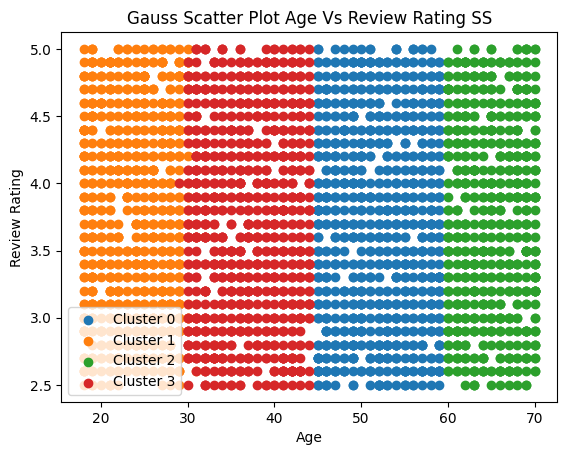

In [ ]:
# Assume 'X' is your features and 'y_km' are the labels from clustering
unique_labels = np.unique(labels)
for label in unique_labels:
    plt.scatter(X[labels == label][X_column], X[labels == label][y_column], label=f'Cluster {label}')

plt.title(f"Gauss Scatter Plot {X_column} Vs {y_column} SS")
plt.xlabel(X_column)
plt.ylabel(y_column)
plt.legend()
plt.show()

In [ ]:
np.bincount(labels)

array([1142,  906,  788, 1064])

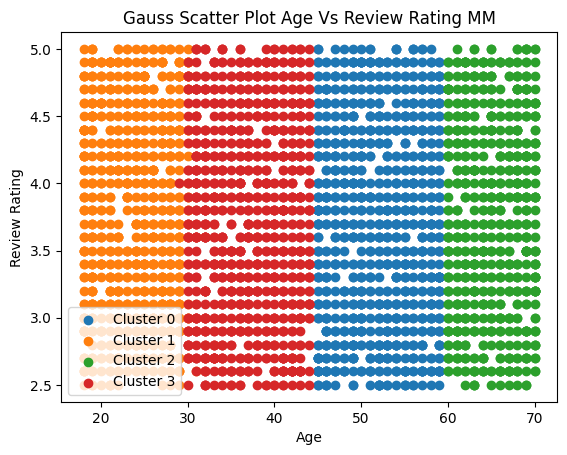

In [ ]:
# Create an instance of Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=42)

# Fit the model to the data
gmm.fit(X_scaled_mm)

# Predict cluster labels
labels_mm = gmm.predict(X_scaled_mm)

# Assume 'X' is your features and 'y_km' are the labels from clustering
unique_labels = np.unique(labels_mm)
for label in unique_labels:
    plt.scatter(X[labels_mm == label][X_column], X[labels_mm == label][y_column], label=f'Cluster {label}')

plt.title(f"Gauss Scatter Plot {X_column} Vs {y_column} MM")
plt.xlabel(X_column)
plt.ylabel(y_column)
plt.legend()
plt.show()

In [ ]:
silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.510840542462339


In [ ]:
silhouette_avg = silhouette_score(X_scaled_mm, labels_mm)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.510840542462339


In [ ]:
score = silhouette_score(X_scaled, labels)

new_row = {"Model": f"Gaussian {X_column} {y_column} SS", "Silhouette Score": score}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

Model  Silhouette Score
0   K-Means Age Review Rating SS          0.516945
1   K-Means Age Review Rating MM          0.516945
4  Gaussian Age Review Rating SS          0.510841
2       AHC Age Review Rating SS          0.498850
3       AHC Age Review Rating MM          0.498850

In [ ]:
score = silhouette_score(X_scaled_mm, labels_mm)

new_row = {"Model": f"Gaussian {X_column} {y_column} MM", "Silhouette Score": score}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

Model  Silhouette Score
0   K-Means Age Review Rating SS          0.516945
1   K-Means Age Review Rating MM          0.516945
4  Gaussian Age Review Rating SS          0.510841
5  Gaussian Age Review Rating MM          0.510841
2       AHC Age Review Rating SS          0.498850
3       AHC Age Review Rating MM          0.498850

In [ ]:
gauss = pd.DataFrame(labels, columns=["Gaussian Cluster"])
gauss

Gaussian Cluster
0                    0
1                    1
2                    0
3                    1
4                    0
...                ...
3895                 3
3896                 0
3897                 0
3898                 3
3899                 0

[3900 rows x 1 columns]

## Graph eval

In [ ]:
graph = pd.concat([kmeans, ahc, gauss], axis=1)
graph

KMeans Cluster  AHC Cluster  Gaussian Cluster
0                  1            1                 0
1                  0            0                 1
2                  1            1                 0
3                  0            0                 1
4                  2            1                 0
...              ...          ...               ...
3895               2            3                 3
3896               1            1                 0
3897               1            1                 0
3898               2            3                 3
3899               1            1                 0

[3900 rows x 3 columns]

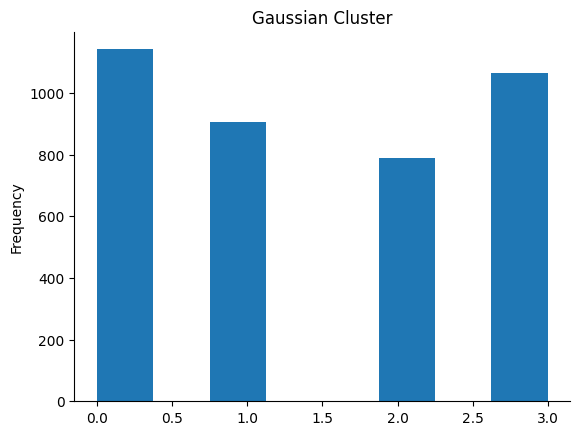

In [ ]:
# @title Gaussian Cluster

from matplotlib import pyplot as plt
graph['Gaussian Cluster'].plot(kind='hist', bins=8, title='Gaussian Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

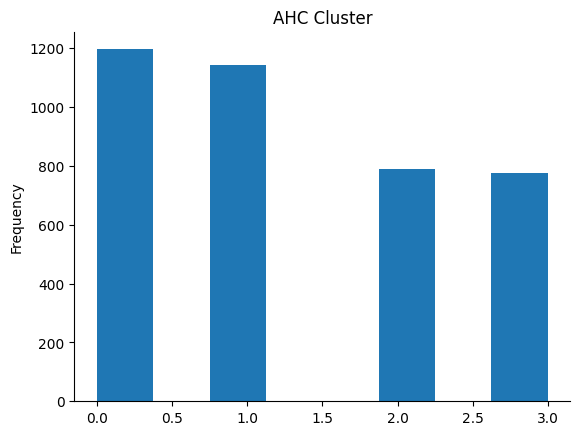

In [ ]:
# @title AHC Cluster

from matplotlib import pyplot as plt
graph['AHC Cluster'].plot(kind='hist', bins=8, title='AHC Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

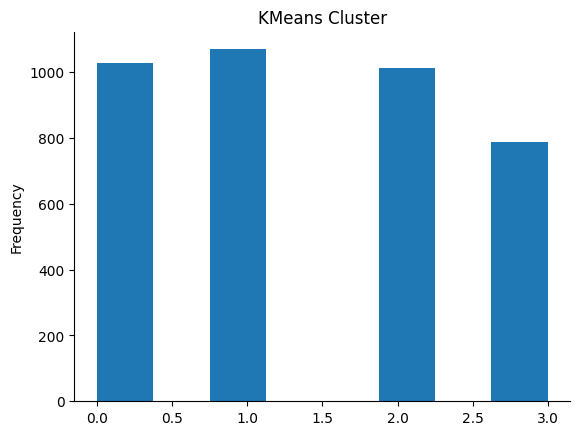

In [ ]:
# @title KMeans Cluster

from matplotlib import pyplot as plt
graph['KMeans Cluster'].plot(kind='hist', bins=8, title='KMeans Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

## K-Modes

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 12647.0


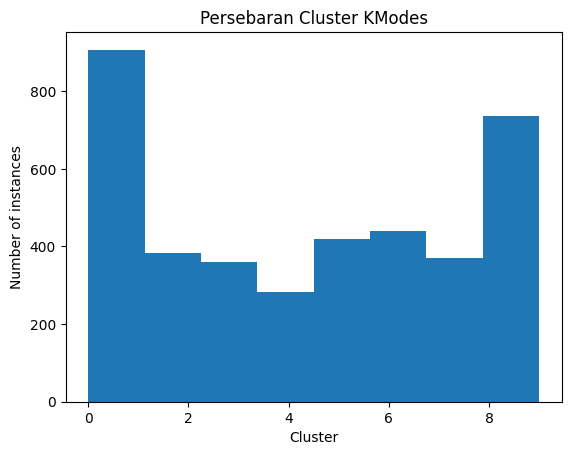

In [ ]:
from kmodes.kmodes import KModes

test_kmode = process_data[["Generation", "Region"]]

# Misalkan data Anda disimpan dalam DataFrame `data`
km = KModes(n_clusters=4, init='Cao', verbose=1)

kmode_cluster = km.fit_predict(X)

plt.hist(clusters, bins=8)
plt.xlabel('Cluster')
plt.ylabel('Number of instances')
plt.title('Persebaran Cluster KModes')
plt.show()

In [ ]:
np.bincount(kmode_cluster)

array([2264,  770,  540,  326])

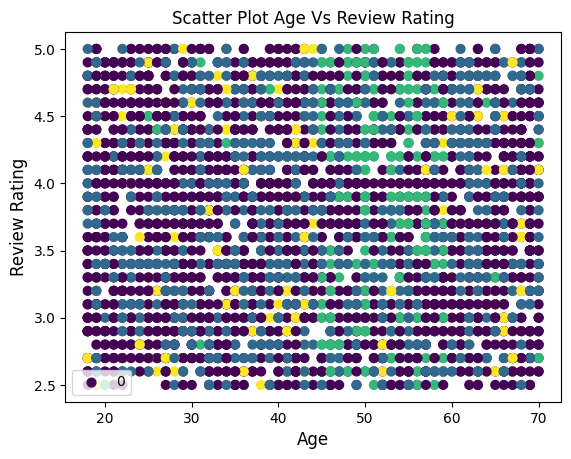

In [ ]:
# Plot clusters
plt.scatter(max_df[X_column], max_df[y_column], c=kmode_cluster, s=40, cmap='viridis')
plt.title(f"Scatter Plot {X_column} Vs {y_column}")
plt.xlabel(X_column, fontsize=12)
plt.ylabel(y_column, fontsize=12)

plt.legend(kmode_cluster)
plt.show()

In [ ]:
# Hitung skor siluet
silhouette_avg = silhouette_score(max_df, kmode_cluster, metric='hamming')

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.010154210565084898


In [ ]:
score = silhouette_score(max_df, kmode_cluster, metric='hamming')

new_row = {"Model": f"KModes {X_column} {y_column} SS", "Silhouette Score": score}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

Model  Silhouette Score
0   K-Means Age Review Rating SS          0.552705
1   K-Means Age Review Rating MM          0.552705
2       AHC Age Review Rating SS          0.498850
3       AHC Age Review Rating MM          0.498850
4  Gaussian Age Review Rating SS          0.186911
5  Gaussian Age Review Rating MM          0.186911
6    KModes Age Review Rating SS          0.010154

## K-Prototypes

In [ ]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score

In [ ]:
marketing_df = max_df.copy()
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3900 non-null   int64  
 1   Gender                  3900 non-null   int64  
 2   Category                3900 non-null   int64  
 3   Purchase Amount (USD)   3900 non-null   int64  
 4   Size                    3900 non-null   int64  
 5   Season                  3900 non-null   int64  
 6   Review Rating           3900 non-null   float64
 7   Subscription Status     3900 non-null   int64  
 8   Shipping Type           3900 non-null   int64  
 9   Discount Applied        3900 non-null   int64  
 10  Promo Code Used         3900 non-null   int64  
 11  Previous Purchases      3900 non-null   int64  
 12  Payment Method          3900 non-null   int64  
 13  Frequency of Purchases  3900 non-null   int64  
 14  Far West                3900 non-null   

In [ ]:
mark_array = marketing_df.values

# Convert certain columns to float type
mark_array[:, 0] = mark_array[:, 0].astype(float)
mark_array[:, 3] = mark_array[:, 3].astype(float)
mark_array[:, 11] = mark_array[:, 11].astype(float)

# Perform clustering using K-Prototypes
kproto = KPrototypes(n_clusters=4, verbose=2, max_iter=20)
kproto_clusters = kproto.fit_predict(mark_array, categorical=[12])

# Print cluster centroids
print(kproto.cluster_centroids_)

# Assign clusters to dataframe
marketing_df['cluster'] = kproto_clusters

# Get cluster counts
cluster_counts = marketing_df["cluster"].value_counts()
print(cluster_counts)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 389, ncost: 1661510.2684645043
Run: 1, iteration: 2/20, moves: 273, ncost: 1634626.0608256669
Run: 1, iteration: 3/20, moves: 183, ncost: 1623644.6799373336
Run: 1, iteration: 4/20, moves: 111, ncost: 1620543.3127698891
Run: 1, iteration: 5/20, moves: 38, ncost: 1620089.273033209
Run: 1, iteration: 6/20, moves: 19, ncost: 1619988.0558363397
Run: 1, iteration: 7/20, moves: 4, ncost: 1619976.4412173599
Run: 1, iteration: 8/20, moves: 1, ncost: 1619975.2553340404
Run: 1, iteration: 9/20, moves: 0, ncost: 1619975.2553340404
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 909, ncost: 1687224.5485206963
Run: 2, iteration: 2/20, moves: 416, ncost: 1647534.226154998
Run: 2, iteration: 3/20, moves: 228, ncost: 1631862.5821559513
Run: 2, iteration:

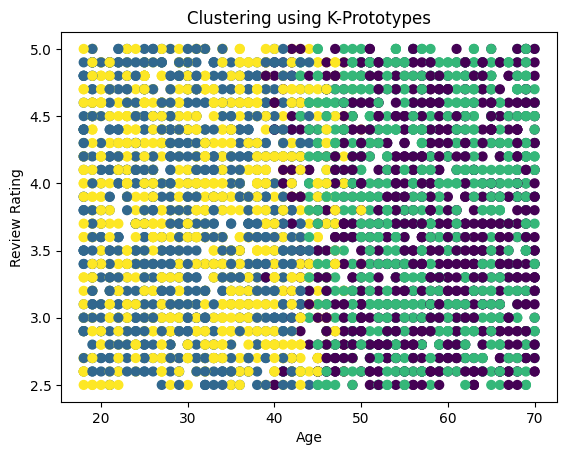

In [ ]:
# Plot clusters
plt.scatter(marketing_df["Age"], marketing_df["Review Rating"], c=marketing_df["cluster"], s=40, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Review Rating')
plt.title('Clustering using K-Prototypes')
plt.show()

In [ ]:
# Calculate silhouette score
silhouette_avg = silhouette_score(max_df, kproto_clusters)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.24631286994961435


In [ ]:
new_row = {"Model": f"K-Prototypes {X_column} {y_column}", "Silhouette Score": silhouette_avg}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

Model  Silhouette Score
0    K-Means Age Review Rating SS          0.552705
1    K-Means Age Review Rating MM          0.552705
2        AHC Age Review Rating SS          0.498850
3        AHC Age Review Rating MM          0.498850
7  K-Prototypes Age Review Rating          0.246313
4   Gaussian Age Review Rating SS          0.186911
5   Gaussian Age Review Rating MM          0.186911
6     KModes Age Review Rating SS          0.010154

## BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)

In [ ]:
YS = max_df[["Age", "Review Rating"]]

In [ ]:
from sklearn.cluster import Birch
import numpy as np

# Instantiate BIRCH clustering model
birch = Birch(n_clusters=2)

# Fit the model to the data
birch.fit(X)

# Get cluster labels
birch_labels = birch.labels_

# Print cluster labels
print("Cluster labels:", labels)

Cluster labels: [0 1 0 ... 0 0 0]


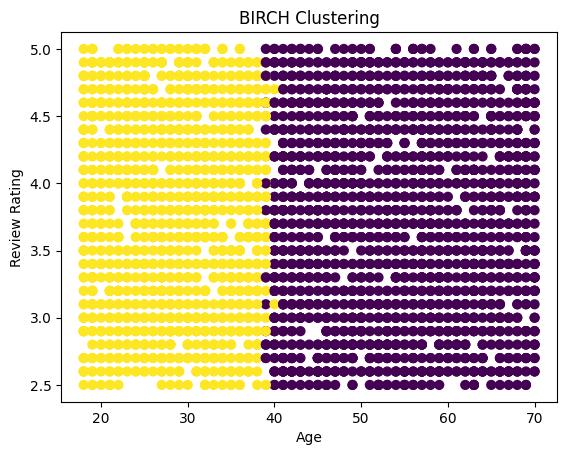

In [ ]:
plt.scatter(max_df[X_column], max_df[y_column], c=birch_labels, cmap='viridis', s=40)
plt.xlabel(X_column)
plt.ylabel(y_column)
plt.title('BIRCH Clustering')
plt.show()

In [ ]:
silhouette_avg = silhouette_score(X, birch_labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.589970324471258


In [ ]:
np.bincount(labels)

array([2310, 1590])

In [ ]:
new_row = {"Model": f"BIRCH {X_column} {y_column} (4)", "Silhouette Score": silhouette_avg}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

Model  Silhouette Score
8     BIRCH Age Review Rating (4)          0.589970
0    K-Means Age Review Rating SS          0.552705
1    K-Means Age Review Rating MM          0.552705
2        AHC Age Review Rating SS          0.498850
3        AHC Age Review Rating MM          0.498850
7  K-Prototypes Age Review Rating          0.246313
4   Gaussian Age Review Rating SS          0.186911
5   Gaussian Age Review Rating MM          0.186911
6     KModes Age Review Rating SS          0.010154

In [ ]:
# Instantiate BIRCH clustering model
birch = Birch(n_clusters=4)

# Fit the model to the data
birch.fit(max_df)

# Get cluster labels
labels = birch.labels_

# Print cluster labels
print("Cluster labels:", labels)

Cluster labels: [3 2 0 ... 3 2 0]


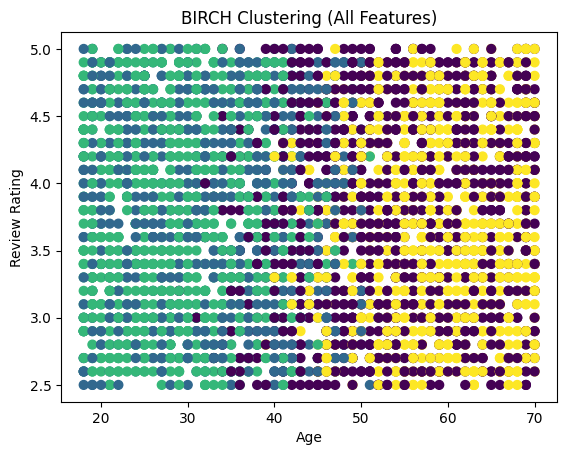

In [ ]:
plt.scatter(max_df['Age'], max_df['Review Rating'], c=labels, cmap='viridis', s=40)
plt.xlabel('Age')
plt.ylabel('Review Rating')
plt.title('BIRCH Clustering (All Features)')
plt.show()

In [ ]:
silhouette_avg = silhouette_score(max_df, labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.20824452111311775


In [ ]:
new_row = {"Model": f"BIRCH {X_column} {y_column} (All Column)", "Silhouette Score": silhouette_avg}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

Model  Silhouette Score
8           BIRCH Age Review Rating (4)          0.589970
0          K-Means Age Review Rating SS          0.552705
1          K-Means Age Review Rating MM          0.552705
2              AHC Age Review Rating SS          0.498850
3              AHC Age Review Rating MM          0.498850
7        K-Prototypes Age Review Rating          0.246313
9  BIRCH Age Review Rating (All Column)          0.208245
4         Gaussian Age Review Rating SS          0.186911
5         Gaussian Age Review Rating MM          0.186911
6           KModes Age Review Rating SS          0.010154

In [ ]:
birchs = pd.DataFrame(birch_labels, columns=["BIRCH clusters"])
print(birchs)

      BIRCH clusters
0                  0
1                  1
2                  0
3                  1
4                  0
...              ...
3895               0
3896               0
3897               0
3898               0
3899               0

[3900 rows x 1 columns]


## Evaluation

In [ ]:
from sklearn import metrics

def evaluate_clustering(labels_pred, data):
    print("Silhouette Score:", metrics.silhouette_score(data, labels_pred))
    print("Davies-Bouldin Index:", metrics.davies_bouldin_score(data, labels_pred))
    print("Calinski-Harabasz Index:", metrics.calinski_harabasz_score(data, labels_pred))
    # print("Dunn Index:", metrics.dunn_index(data, labels_pred))

In [ ]:
print("KMeans Clustering SS")
evaluate_clustering(y_km, X_scaled)

KMeans Clustering SS
Silhouette Score: 0.552705387889564
Davies-Bouldin Index: 0.5529913895417756
Calinski-Harabasz Index: 13897.889786768543


In [ ]:
print("KMeans Clustering MM")
evaluate_clustering(y_km_mm, X_scaled_mm)

KMeans Clustering MM
Silhouette Score: 0.552705387889564
Davies-Bouldin Index: 0.5529913895417756
Calinski-Harabasz Index: 13897.889786768543


In [ ]:
print("Agglomerative Clustering SS")
evaluate_clustering(y_pred, X_scaled)

Agglomerative Clustering SS
Silhouette Score: 0.49884967602144836
Davies-Bouldin Index: 0.5748142806012515
Calinski-Harabasz Index: 15115.252079080174


In [ ]:
print("Agglomerative Clustering MM")
evaluate_clustering(y_pred_mm, X_scaled_mm)

Agglomerative Clustering MM
Silhouette Score: 0.49884967602144836
Davies-Bouldin Index: 0.5748142806012515
Calinski-Harabasz Index: 15115.252079080174


In [ ]:
print("Gaussian Mixture Model SS")
evaluate_clustering(labels, X_scaled)

Gaussian Mixture Model SS
Silhouette Score: -0.00430447918600517
Davies-Bouldin Index: 4.232410077959941
Calinski-Harabasz Index: 2884.852319569446


In [ ]:
print("Gaussian Mixture Model MM")
evaluate_clustering(labels_mm, X_scaled_mm)

Gaussian Mixture Model MM
Silhouette Score: 0.18691111623307588
Davies-Bouldin Index: 1.634740495376137
Calinski-Harabasz Index: 507.42727512359056


Business Insights

1. Spesific :
2. Measurable :
3. Action Oriented
4. Relevant :
5. Time Bound : This project final presentation are in 23 March 2024

Business Questions:

1. Bagaimana customer habits and behavior berdasarkan wilayah regional mereka (Dalam Amerika Serikat)
2. Bagaimana sifat mereka dengan pengelompokan umur
3. Seberapa baik dalam melakukan clustering (pengelompokan) dengan Feature Selection

# Fine Tuning Work

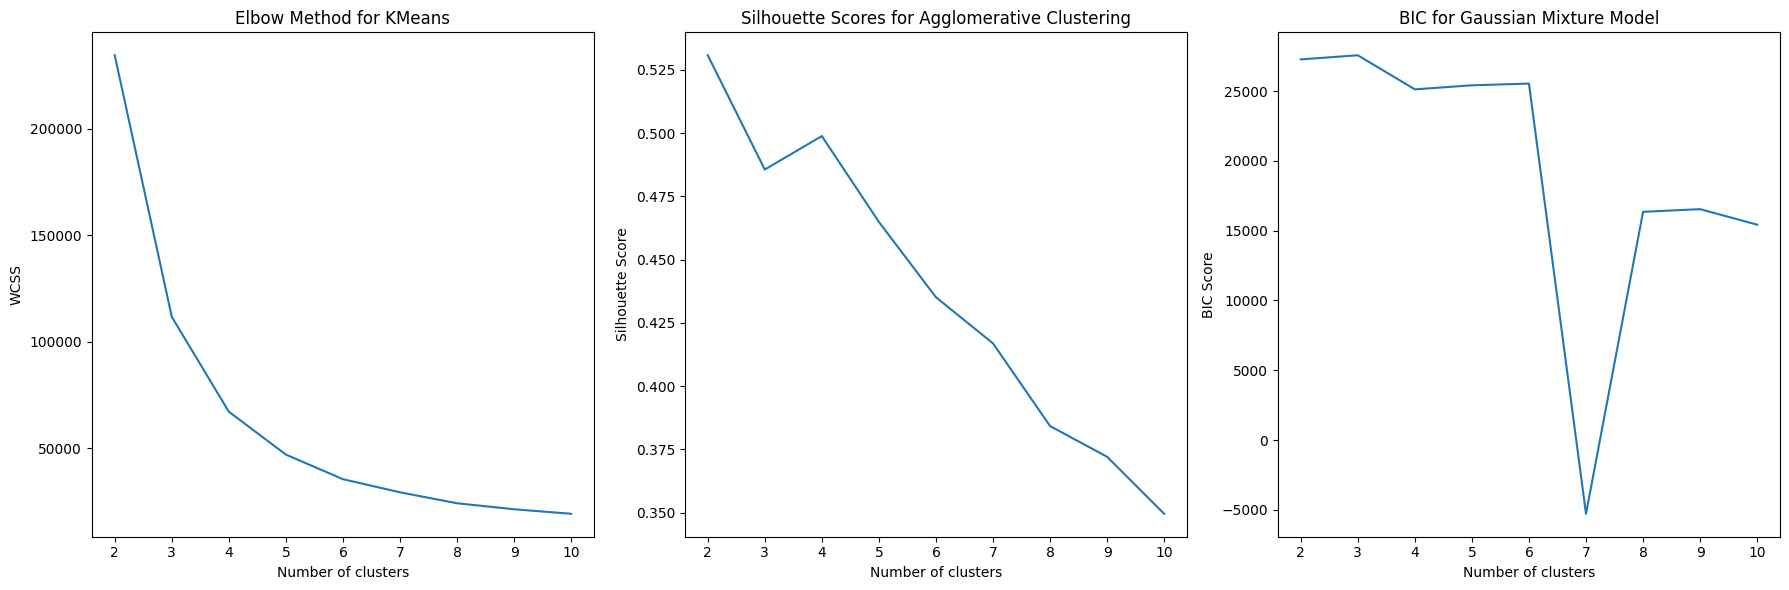

In [ ]:
# Assuming 'process_data' is a DataFrame and 'X_column', 'y_column' are defined
# For demonstration, let's create a dummy 'features' variable
features = X
np.random.seed(0)

# Initialize lists to store metrics
wcss = []  # For KMeans
silhouette_scores_agglomerative = []  # For Agglomerative Clustering
bic_scores = []  # For Gaussian Mixture Model

# Range of potential clusters
n_clusters_range = range(2, 11)

# Elbow Method for KMeans
for i in n_clusters_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Adapting for Agglomerative Clustering (using silhouette scores as a substitute metric)
for i in n_clusters_range:
    agglomerative = AgglomerativeClustering(n_clusters=i)
    labels = agglomerative.fit_predict(features)
    silhouette_scores_agglomerative.append(silhouette_score(features, labels))

# Adapting for Gaussian Mixture Model (using BIC as a metric)
for i in n_clusters_range:
    gmm = GaussianMixture(n_components=i, random_state=0)
    gmm.fit(features)
    bic_scores.append(gmm.bic(features))

# Plotting the results for each method
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method for KMeans')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.subplot(1, 3, 2)
plt.plot(n_clusters_range, silhouette_scores_agglomerative)
plt.title('Silhouette Scores for Agglomerative Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 3)
plt.plot(n_clusters_range, bic_scores)
plt.title('BIC for Gaussian Mixture Model')
plt.xlabel('Number of clusters')
plt.ylabel('BIC Score')

plt.tight_layout()
plt.show()


## KModes Fine Tuning

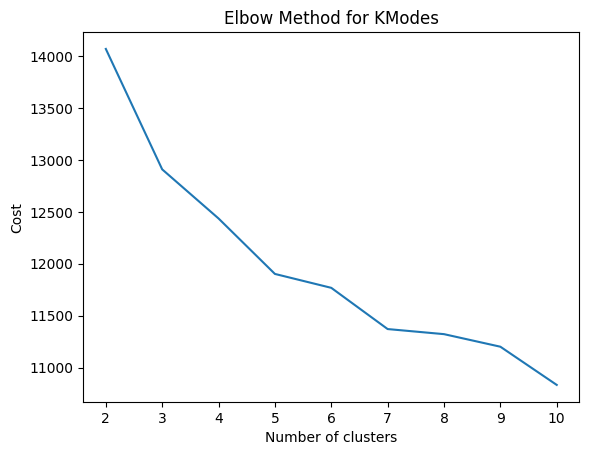

In [ ]:
from kmodes.kmodes import KModes

# costs = []
# for num_clusters in range(2, 11):
#     kmodes = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=1)
#     clusters = kmodes.fit_predict(features)
#     costs.append(kmodes.cost_)

plt.plot(range(2, 11), costs)
plt.title('Elbow Method for KModes')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.show()

## K-Prototypes Fine Tuning

## BIRCH Fine Tuning

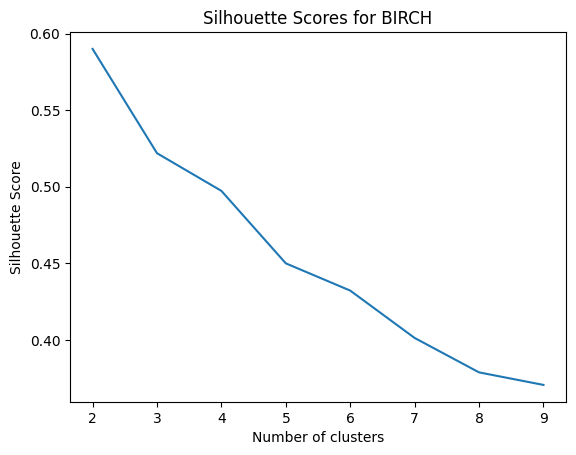

In [ ]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score

silhouette_scores = []
for num_clusters in range(2, 10):
    birch = Birch(n_clusters=num_clusters)
    labels = birch.fit_predict(features)
    score = silhouette_score(features, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 10), silhouette_scores)
plt.title('Silhouette Scores for BIRCH')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Text(0, 0.5, 'Calinski-Harabasz Index')

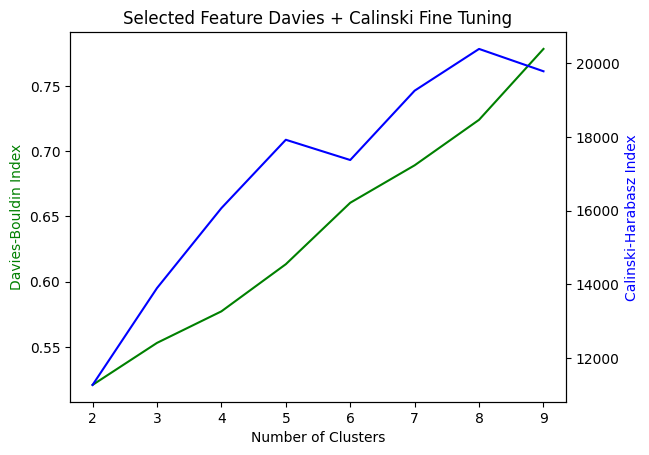

In [ ]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

dbi_scores = []  # Davies-Bouldin Index scores
chi_scores = []  # Calinski-Harabasz Index scores

for num_clusters in range(2, 10):
    km = KMeans(n_clusters=num_clusters, random_state=0, n_init="auto")
    km.fit(X)
    labels = km.labels_  # Predicted labels
    dbi_scores.append(davies_bouldin_score(X, labels))
    # Compute Calinski-Harabasz Index using true labels if available
    # If true labels are not available, you can use the predicted labels
    chi_scores.append(calinski_harabasz_score(X, labels))

ig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(range(2, 10), dbi_scores, 'g-')
ax2.plot(range(2, 10), chi_scores, 'b-')

plt.title("Selected Feature Davies + Calinski Fine Tuning")
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Davies-Bouldin Index', color='g')
ax2.set_ylabel('Calinski-Harabasz Index', color='b')

Text(0, 0.5, 'Calinski-Harabasz Index')

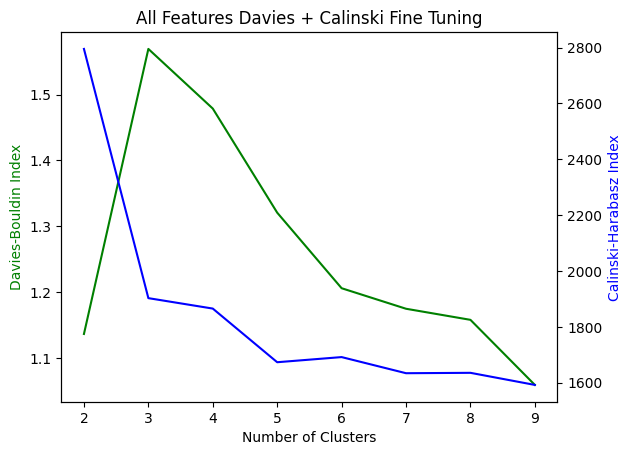

In [ ]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

dbi_scores = []  # Davies-Bouldin Index scores
chi_scores = []  # Calinski-Harabasz Index scores

for num_clusters in range(2, 10):
    km = KMeans(n_clusters=num_clusters, random_state=0, n_init="auto")
    km.fit(max_df)
    labels = km.labels_  # Predicted labels
    dbi_scores.append(davies_bouldin_score(max_df, labels))
    # Compute Calinski-Harabasz Index using true labels if available
    # If true labels are not available, you can use the predicted labels
    chi_scores.append(calinski_harabasz_score(max_df, labels))

ig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(range(2, 10), dbi_scores, 'g-')
ax2.plot(range(2, 10), chi_scores, 'b-')

plt.title("All Features Davies + Calinski Fine Tuning")
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Davies-Bouldin Index', color='g')
ax2.set_ylabel('Calinski-Harabasz Index', color='b')

## Grab your passport and regretme

In [ ]:
# clus_score.sort_values("Silhouette Score", ascending=False)

In [ ]:
clus_score.sort_values("Silhouette Score", ascending=False)

Model  Silhouette Score
2              AHC Age Review Rating SS          0.530785
8               BIRCH Age Review Rating          0.521878
0          K-Means Age Review Rating SS          0.516945
1          K-Means Age Review Rating MM          0.516945
4         Gaussian Age Review Rating SS          0.510841
5         Gaussian Age Review Rating MM          0.510841
3              AHC Age Review Rating MM          0.498850
7        K-Prototypes Age Review Rating          0.246326
9  BIRCH Age Review Rating (All Column)          0.208245
6           KModes Age Review Rating SS          0.010154

In [ ]:
clus_score.sort_values("Silhouette Score", ascending=False)

Model  Silhouette Score
2              AHC Age Review Rating SS          0.530785
8               BIRCH Age Review Rating          0.521878
0          K-Means Age Review Rating SS          0.516945
1          K-Means Age Review Rating MM          0.516945
4         Gaussian Age Review Rating SS          0.510841
5         Gaussian Age Review Rating MM          0.510841
3              AHC Age Review Rating MM          0.498850
7        K-Prototypes Age Review Rating          0.246326
9  BIRCH Age Review Rating (All Column)          0.208245
6           KModes Age Review Rating SS          0.010154

In [ ]:
clus_score.sort_values("Silhouette Score", ascending=False)

Model  Silhouette Score
2              AHC Age Review Rating SS          0.530785
8               BIRCH Age Review Rating          0.521878
0          K-Means Age Review Rating SS          0.516945
1          K-Means Age Review Rating MM          0.516945
4         Gaussian Age Review Rating SS          0.510841
5         Gaussian Age Review Rating MM          0.510841
3              AHC Age Review Rating MM          0.498850
7        K-Prototypes Age Review Rating          0.246326
9  BIRCH Age Review Rating (All Column)          0.208245
6           KModes Age Review Rating SS          0.010154

In [ ]:
clus_score.sort_values("Silhouette Score", ascending=False)

Model  Silhouette Score
0  K-Means Age Review Rating SS          0.554945
1  K-Means Age Review Rating MM          0.554945
2  K-Means Age Review Rating SS          0.552853
3  K-Means Age Review Rating MM          0.552853

# Conclusion

## Eval

In [ ]:
new_df = pd.concat([process_data, kmeans, birchs], axis=1)
print(new_df)

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  ...  \
0                        53       Kentucky    L       Gray  Winter  ...   
1                        64          Maine    L     Maroon  Winter  ...   
2                        73  M

To do list :
Memperlihatkan rata2 purchase tiap generasi

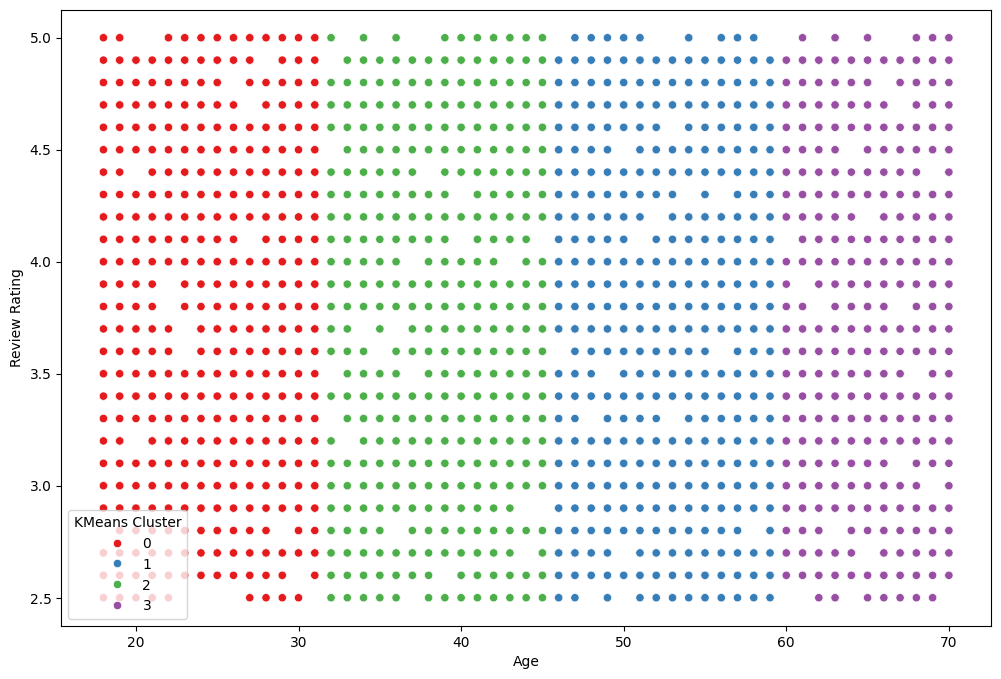

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=new_df, x='Age', y='Review Rating', hue="KMeans Cluster", palette="Set1")
plt.show()

<ipython-input-547-129ffd15b2d9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df.corr(), annot=True);


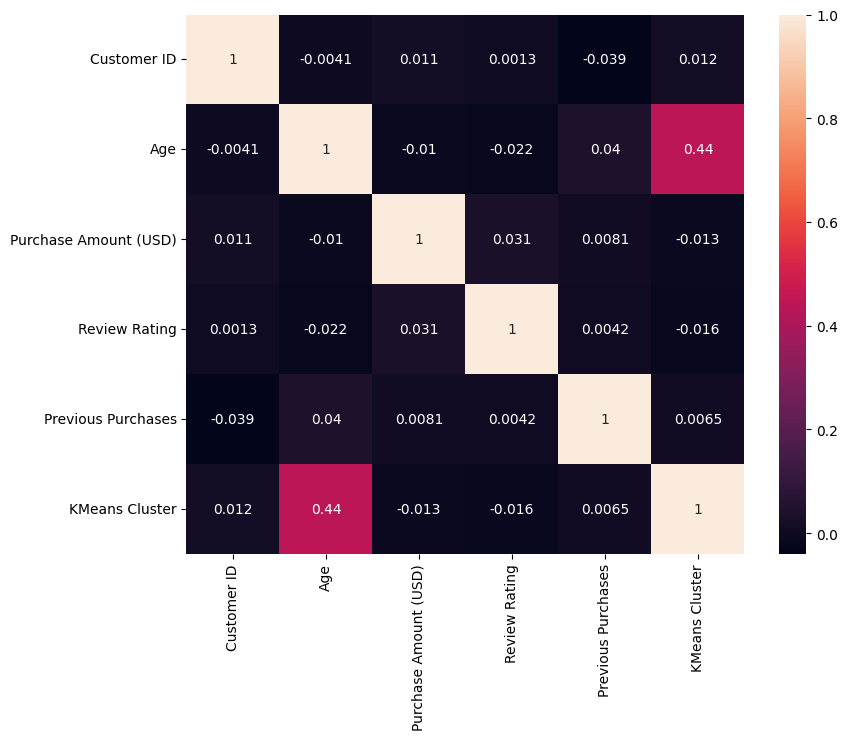

In [ ]:
plt.figure(figsize=(9,7))
sns.heatmap(new_df.corr(), annot=True);
plt.show()

KeyError: 'Region'

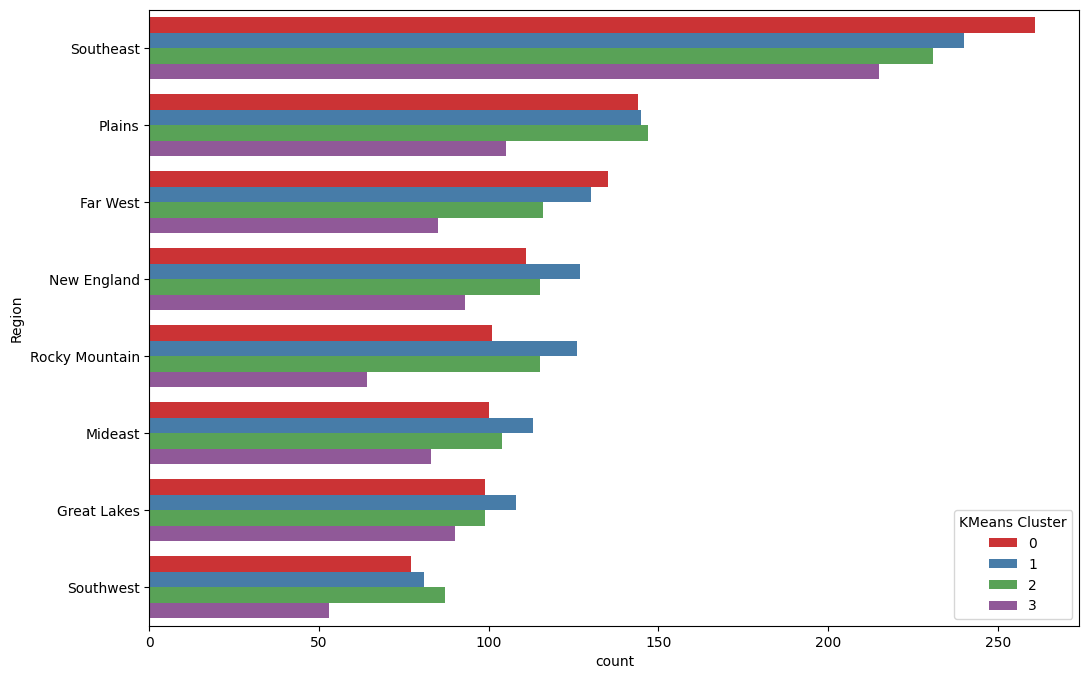

In [ ]:
column = "Region"

plt.figure(figsize=(12, 8))

# Sorting the data for the current column
sorted_data = new_df[column].value_counts().reset_index().rename(columns={'index': column, column: 'count'})
sorted_data = sorted_data.sort_values(by='count', ascending=False)

ax = sns.countplot(y=column, data=new_df, order=sorted_data[column], hue="KMeans Cluster", palette="Set1")

plt.title(f'Persebaran dari kolom {column}\nDengan {len(data[column].unique())} Unique Value')
plt.xlabel('Jumlah')
plt.ylabel(column)

plt.show()

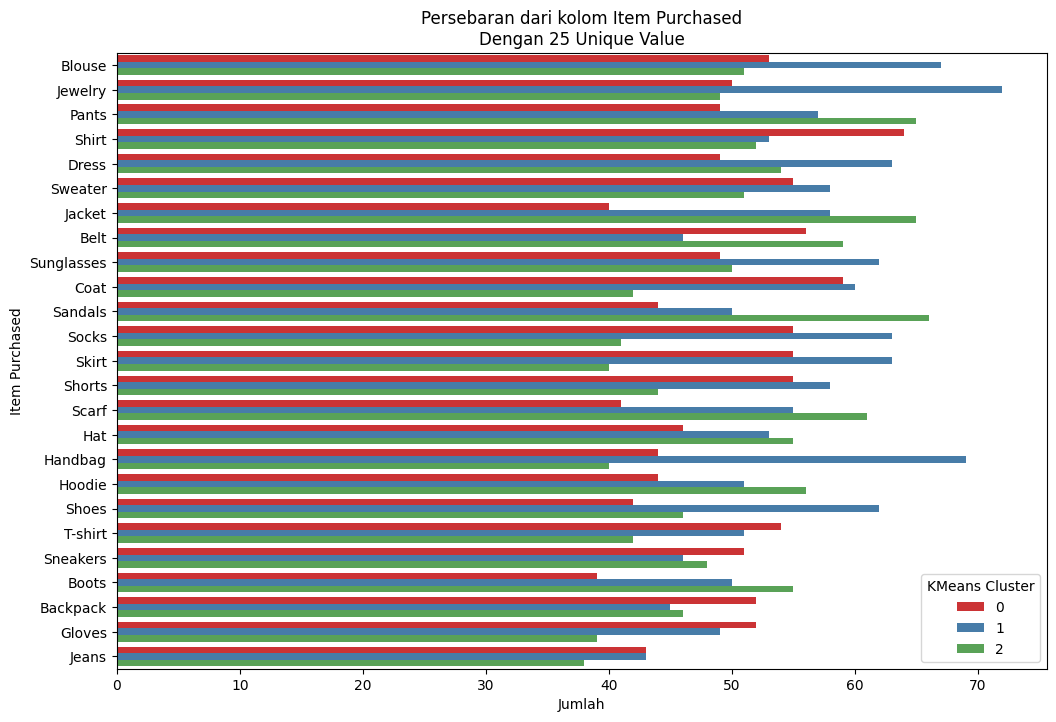

In [ ]:
column = "Item Purchased"

plt.figure(figsize=(12, 8))

# Sorting the data for the current column
sorted_data = new_df[column].value_counts().reset_index().rename(columns={'index': column, column: 'count'})
sorted_data = sorted_data.sort_values(by='count', ascending=False)

ax = sns.countplot(y=column, data=new_df, order=sorted_data[column], hue="KMeans Cluster", palette="Set1")

plt.title(f'Persebaran dari kolom {column}\nDengan {len(data[column].unique())} Unique Value')
plt.xlabel('Jumlah')
plt.ylabel(column)

plt.show()

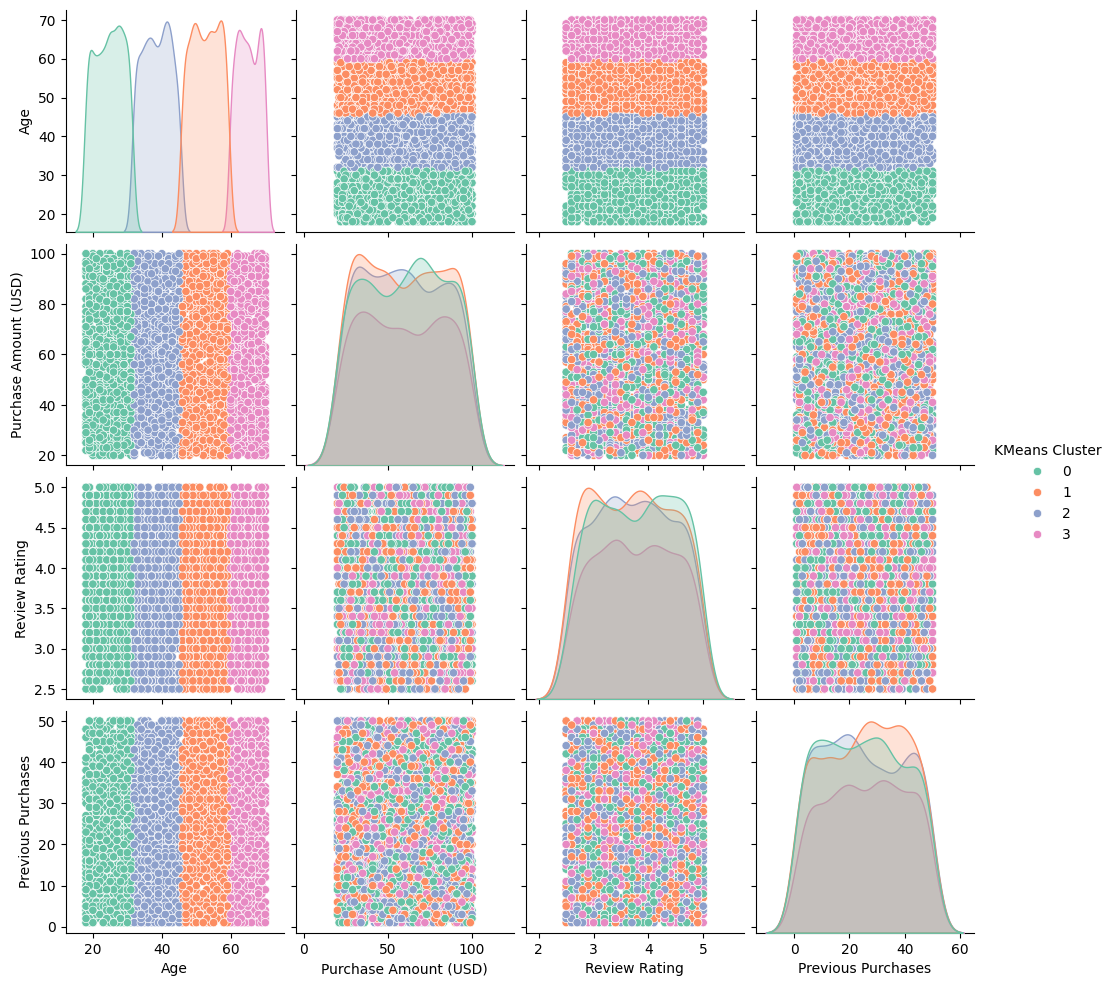

In [ ]:
sns.pairplot(new_df, hue='KMeans Cluster', vars=['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases'], palette='Set2')
plt.show()

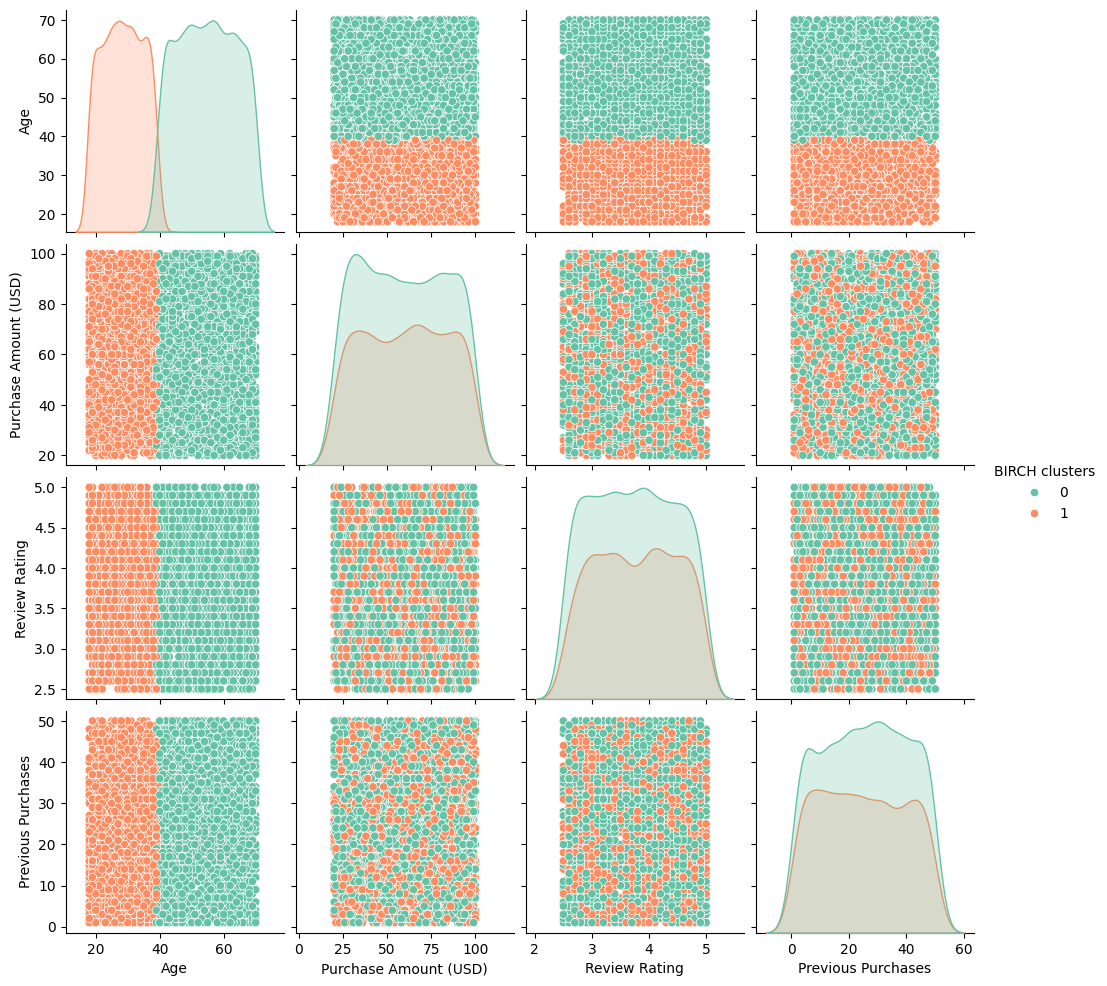

In [ ]:
sns.pairplot(new_df, hue='BIRCH clusters', vars=['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases'], palette='Set2')
plt.show()

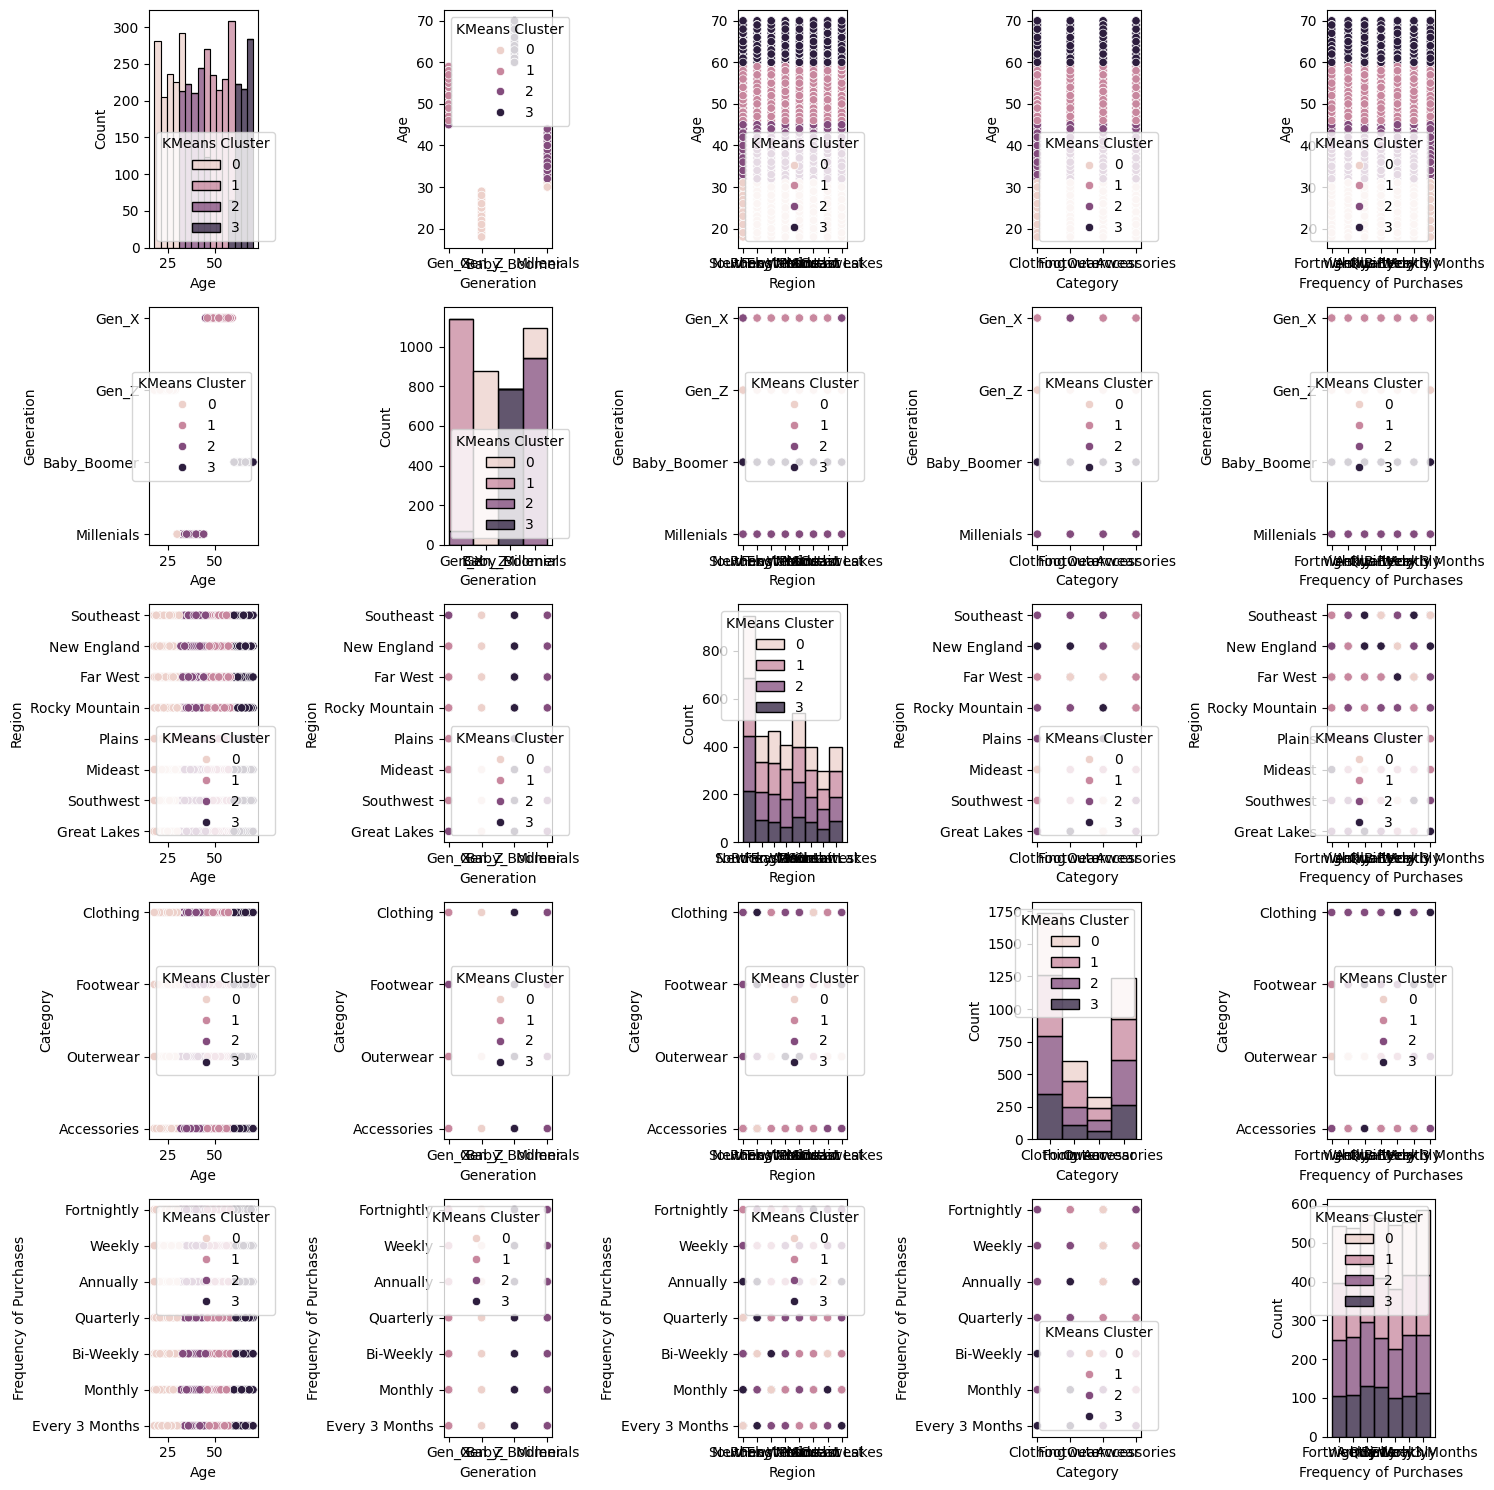

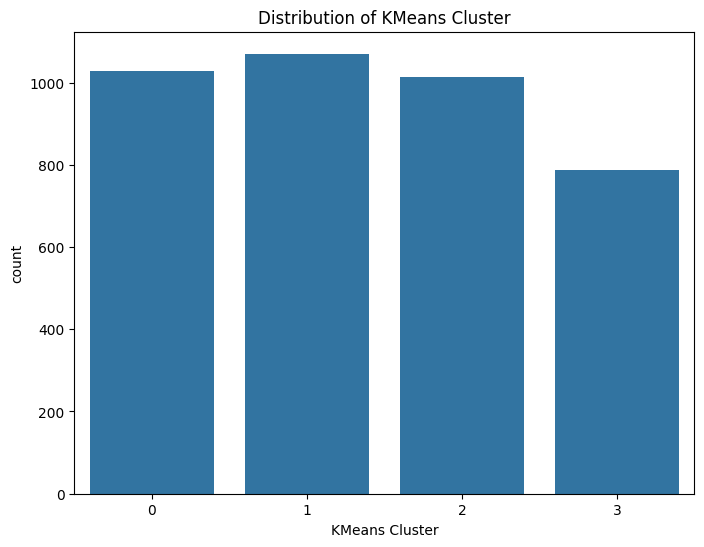

<ipython-input-255-6d17d8bb694f>:50: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segment_means = data.groupby('KMeans Cluster').mean()


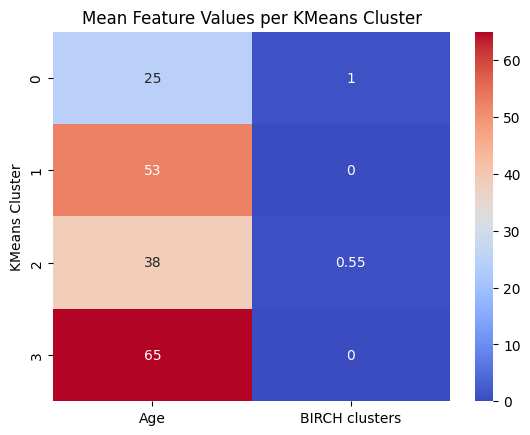

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Generating a fictitious dataset with cluster labels for demonstration purposes
np.random.seed(42)
data = new_df[[
    "Age",
    "Generation",
    "Region",
    "Category",
    "Frequency of Purchases",
    "KMeans Cluster",
    "BIRCH clusters"
]]

# Scatter plots for numerical features
features = [
    "Age",
    "Generation",
    "Region",
    "Category",
    "Frequency of Purchases",
]
n_features = len(features)
fig, axes = plt.subplots(n_features, n_features, figsize=(15, 15))

for i in range(n_features):
    for j in range(n_features):
        if i == j:  # Diagonal, plot the count distribution of the feature for each cluster
            sns.histplot(data, x=features[i], hue='KMeans Cluster', multiple='stack', ax=axes[i, j])
        else:
            sns.scatterplot(data=data, x=features[j], y=features[i], hue='KMeans Cluster', ax=axes[i, j])

plt.tight_layout()
plt.show()

# # Pair plot to visualize relationships between all numerical features
# sns.pairplot(data, hue='KMeans Cluster', vars=features, palette='bright')
# plt.show()

# Bar chart for distribution of segments
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='KMeans Cluster')
plt.title('Distribution of KMeans Cluster')
plt.show()



In [ ]:
num_data

Age  Purchase Amount (USD)  Previous Purchases  Review Rating  \
0      55                     53                  14            3.1   
1      19                     64                   2            3.1   
2      50                     73                  23            3.1   
3      21                     90                  49            3.5   
4      45                     49                  31            2.7   
...   ...                    ...                 ...            ...   
3895   40                     28                  32            4.2   
3896   52                     49                  41            4.5   
3897   46                     33                  24            2.9   
3898   44                     77                  24            3.8   
3899   52                     81                  33            3.1   

      KMeans Cluster  BIRCH clusters  KMeans Cluster  KMeans Cluster  \
0                  1               0               1               1   
1                  0               1               0               0   
2                  1               0               1               1   
3                  0               1               0               0   
4                  2               0               2               2   
...              ...             ...             ...             ...   
3895               2               0               2               2   
3896               1               0               1               1   
3897               1               0               1               1   
3898               2               0               2               2   
3899               1               0               1               1   

      KMeans Cluster  BIRCH clusters  
0                  1               0  
1                  0               1  
2                  1               0  
3                  0               1  
4                  2               0  
...              ...             ...  
3895               2               0  
3896               1               0  
3897               1               0  
3898               2               0  
3899               1               0  

[3900 rows x 10 columns]

In [ ]:
num_datas = pd.concat([num_data, kmeans, birchs], axis=1)

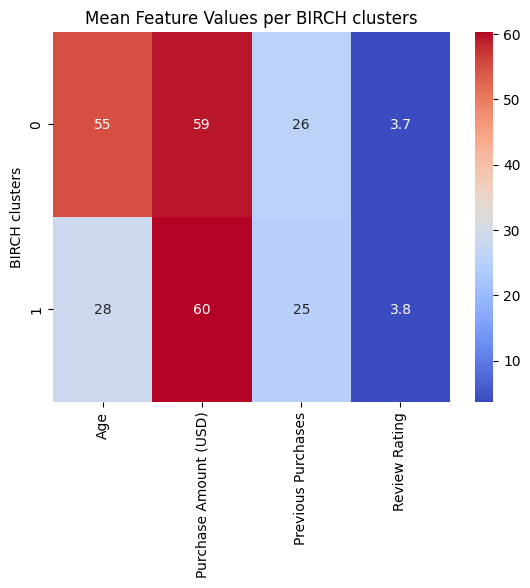

In [ ]:
# Heatmap to show the mean values of each feature per segment
segment_means = num_datas.groupby('BIRCH clusters').mean()
sns.heatmap(segment_means, annot=True, cmap='coolwarm')
plt.title('Mean Feature Values per BIRCH clusters')
plt.show()

In [ ]:
count = pd.DataFrame(new_df["Generation"].value_counts())

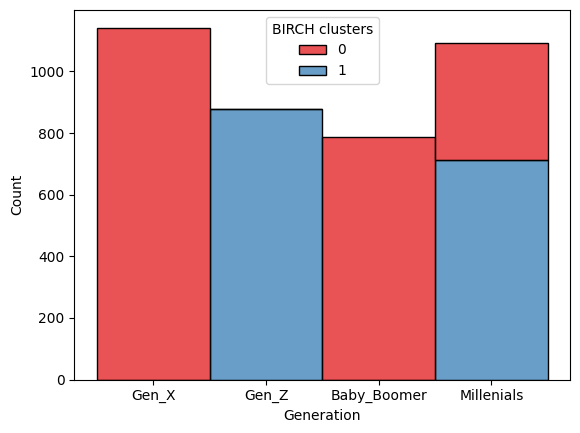

In [ ]:
sns.histplot(new_df, x='Generation', hue='BIRCH clusters', multiple='stack', palette="Set1")
plt.show()

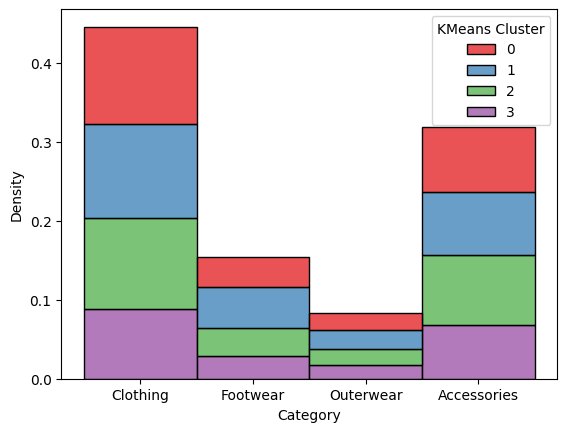

In [ ]:
sns.histplot(new_df, x='Category', hue='KMeans Cluster', multiple='stack', palette="Set1", stat='density')
plt.show()

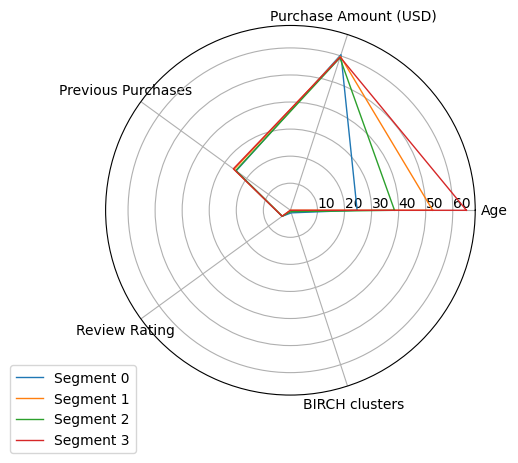

In [ ]:
from math import pi

# Calculate the means for each segment
segment_means = num_datas.groupby('KMeans Cluster').mean().reset_index()

# Number of variables
categories = list(segment_means)[1:]
N = len(categories)

# What will be the angle of each axis in the plot?
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)

# Plot data
for i in range(segment_means.shape[0]):
    values = segment_means.loc[i].drop('KMeans Cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Segment {i}')

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

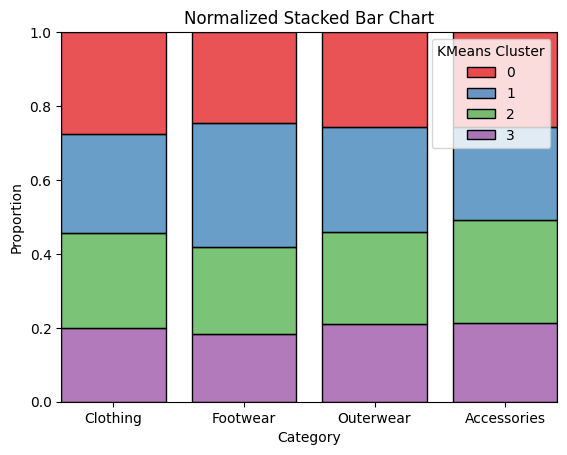

In [ ]:
sns.histplot(
    data=new_df,
    x='Category',
    hue='KMeans Cluster',
    multiple='fill',  # This stacks the bars and normalizes them
    palette="Set1",
    shrink=0.8
)

# The 'shrink' parameter is optional and controls the width of the bars.

plt.title('Normalized Stacked Bar Chart')
plt.ylabel('Proportion')  # Update y-axis label to reflect the normalized values
plt.show()

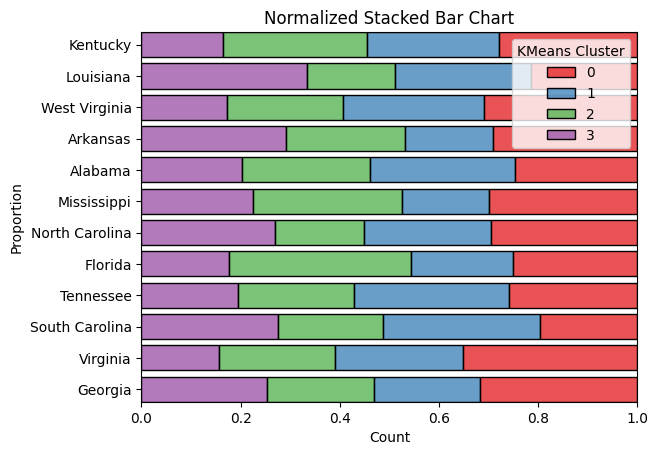

In [ ]:
sns.histplot(
    data=new_df[new_df["Region"] == "Southeast"],
    y='Location',
    hue='KMeans Cluster',
    multiple='fill',  # This stacks the bars and normalizes them
    palette="Set1",
    shrink=0.8
)

# The 'shrink' parameter is optional and controls the width of the bars.

plt.title('Normalized Stacked Bar Chart')
plt.ylabel('Proportion')  # Update y-axis label to reflect the normalized values
plt.show()

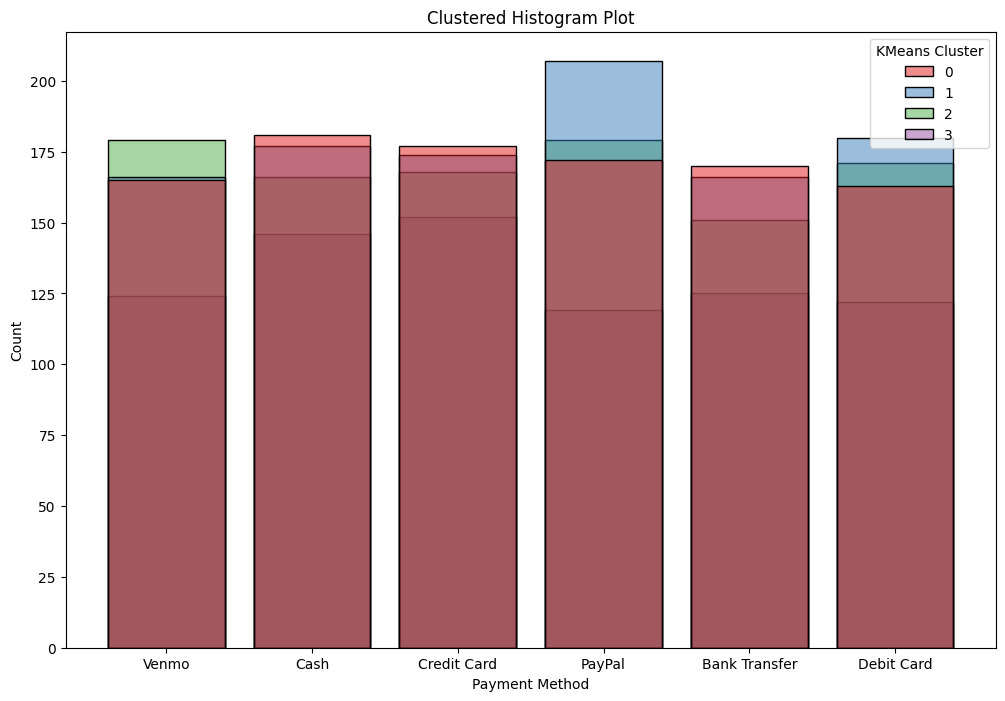

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(
    data=new_df,
    x='Payment Method',
    hue='KMeans Cluster',
    multiple='layer',  # Change to 'layer' for clustered histogram
    palette="Set1",
    shrink=0.8
)

# The 'shrink' parameter is optional and controls the width of the bars.

plt.title('Clustered Histogram Plot')
plt.ylabel('Count')  # Update y-axis label to reflect the count values
plt.show()

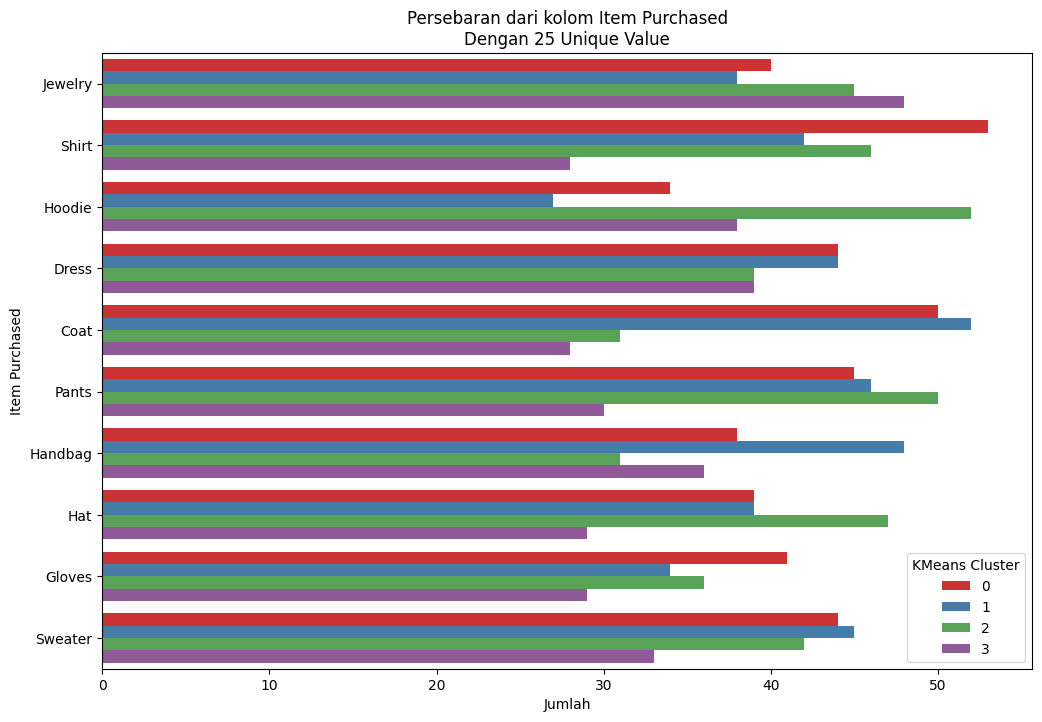

In [ ]:
column = "Item Purchased"

plt.figure(figsize=(12, 8))

# Sorting the data for the current column
sorted_data = new_df[new_df["Region"] == "Southeast"][column].value_counts().reset_index().rename(columns={'index': column, column: 'count'})
sorted_data = sorted_data.sort_values(by='count', ascending=False).head(10)

ax = sns.countplot(y=column, data=new_df, order=sorted_data[column], hue="KMeans Cluster", palette="Set1")

plt.title(f'Persebaran dari kolom {column}\nDengan {len(data[column].unique())} Unique Value')
plt.xlabel('Jumlah')
plt.ylabel(column)

plt.show()

## Import Model

In [ ]:
import pickle

# save the model to disk
filename = 'final_model (Selected Features).pkl'
pickle.dump(kmONLY, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Coba prediksi
y_pred_loaded_model = loaded_model.fit_predict(X_scaled)
score = silhouette_score(X_scaled, y_pred_loaded_model)
score

0.552705387889564

In [ ]:
import pickle

# save the model to disk
filename = 'final_model (Selected Features) (BIRCH 2 Cluster).pkl'
pickle.dump(birch, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Coba prediksi
y_pred_loaded_model = loaded_model.fit_predict(X_scaled)
score = silhouette_score(X_scaled, y_pred_loaded_model)
score

0.589970324471258